In [ ]:
1_2

In [50]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the dataset from the Excel file
df = pd.read_excel('sampletest.xlsx')

# Check if 'Module' column exists in the dataframe
if 'Module' in df.columns:

    # Group by 'Module' column and calculate statistical insights for the columns 'CoM pos x', 'CoM pos y', and 'CoM pos z'
    grouped = df.groupby('Module').agg({
        'CoM pos x': ['max', 'min', 'mean', 'median'],
        'CoM pos y': ['max', 'min', 'mean', 'median'],
        'CoM pos z': ['max', 'min', 'mean', 'median']
    })

    print(grouped)

else:
    print("Module column not found in the dataset.")


         CoM pos x                               CoM pos y            \
               max       min      mean    median       max       min   
Module                                                                 
Module 1 -0.008754 -0.031387 -0.021077 -0.021286  0.010715 -0.004043   
Module 2 -0.009952 -0.035922 -0.020408 -0.017204  0.022552 -0.001853   
Module 3 -0.016443 -0.038728 -0.025603 -0.026023  0.027032 -0.024819   
Module 4 -0.019103 -0.031311 -0.024120 -0.024381  0.009167 -0.000136   
Module 5 -0.010402 -0.038640 -0.031241 -0.035833  0.026126 -0.009589   
Module 6 -0.019264 -0.039129 -0.032758 -0.033365  0.020149 -0.014789   
Module 7 -0.013113 -0.041891 -0.029752 -0.030414  0.022132 -0.023966   
Module 8 -0.021642 -0.037334 -0.031506 -0.031963  0.016046 -0.023462   

                             CoM pos z                                
              mean    median       max       min      mean    median  
Module                                                           

In [4]:
import pandas as pd

# Load the dataset from the Excel file
df = pd.read_excel('sampletest.xlsx')

# Check if required columns exist in the dataframe
columns = ['Module', 'CoM pos x', 'CoM pos y', 'CoM pos z']
if all(col in df.columns for col in columns):

    # Calculate statistics for the specified columns grouped by 'Module'
    grouped_stats = df.groupby('Module').agg({
        'CoM pos x': ['max', 'min', 'mean', 'median', 'std', lambda x: x.max() - x.min(), 'count'],
        'CoM pos y': ['max', 'min', 'mean', 'median', 'std', lambda x: x.max() - x.min(), 'count'],
        'CoM pos z': ['max', 'min', 'mean', 'median', 'std', lambda x: x.max() - x.min(), 'count']
    })
    
    # Renaming the columns for better understanding
    grouped_stats.columns = ["_".join(x) for x in grouped_stats.columns.ravel()]
    
    # Calculate upper and lower thresholds
    for position in ['CoM pos x', 'CoM pos y', 'CoM pos z']:
        grouped_stats[f'{position}_upper_threshold'] = grouped_stats[f'{position}_mean'] + (2 * grouped_stats[f'{position}_std'])
        grouped_stats[f'{position}_lower_threshold'] = grouped_stats[f'{position}_mean'] - (2 * grouped_stats[f'{position}_std'])
    
    print(grouped_stats)
else:
    print("Required columns not found in the dataset.")


          CoM pos x_max  CoM pos x_min  CoM pos x_mean  CoM pos x_median  \
Module                                                                     
Module 1      -0.008754      -0.031387       -0.021077         -0.021286   
Module 2      -0.009952      -0.035922       -0.020408         -0.017204   
Module 3      -0.016443      -0.038728       -0.025603         -0.026023   
Module 4      -0.019103      -0.031311       -0.024120         -0.024381   
Module 5      -0.010402      -0.038640       -0.031241         -0.035833   
Module 6      -0.019264      -0.039129       -0.032758         -0.033365   
Module 7      -0.013113      -0.041891       -0.029752         -0.030414   
Module 8      -0.021642      -0.037334       -0.031506         -0.031963   

          CoM pos x_std  CoM pos x_<lambda_0>  CoM pos x_count  CoM pos y_max  \
Module                                                                          
Module 1       0.007199              0.022632             3370       0.010715

/var/folders/x6/7qm4yz4x3zbggkh1b85j1k2c0000gn/T/ipykernel_13007/2538920761.py:18: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_stats.columns = ["_".join(x) for x in grouped_stats.columns.ravel()]


In [6]:
import pandas as pd

# Sample data is given, replace with your actual data
data = {
    'CoM pos x_max': [-0.008754, -0.009952, -0.016443, -0.019103, -0.010402, -0.019264, -0.013113, -0.021642],
    'CoM pos x_min': [-0.031387, -0.035922, -0.038728, -0.031311, -0.038640, -0.039129, -0.041891, -0.037334],
    'CoM pos y_max': [0.010715, 0.022552, 0.027032, 0.009167, 0.026126, 0.020149, 0.022132, 0.016046],
    'CoM pos y_min': [-0.004043, -0.001853, -0.024819, -0.000136, -0.009589, -0.014789, -0.023966, -0.023462],
    'CoM pos z_max': [1.301517, 1.311561, 1.309220, 1.301840, 1.319721, 1.306332, 1.314085, 1.302303],
    'CoM pos z_min': [1.299880, 1.299160, 1.296624, 1.299585, 1.295317, 1.297368, 1.295520, 1.296272]
}
df = pd.DataFrame(data)

# Calculate the range for CoM pos x, y, and z for all modules
df['CoM pos x_range'] = df['CoM pos x_max'] - df['CoM pos x_min']
df['CoM pos y_range'] = df['CoM pos y_max'] - df['CoM pos y_min']
df['CoM pos z_range'] = df['CoM pos z_max'] - df['CoM pos z_min']

print(df[['CoM pos x_range', 'CoM pos y_range', 'CoM pos z_range']])


   CoM pos x_range  CoM pos y_range  CoM pos z_range
0         0.022633         0.014758         0.001637
1         0.025970         0.024405         0.012401
2         0.022285         0.051851         0.012596
3         0.012208         0.009303         0.002255
4         0.028238         0.035715         0.024404
5         0.019865         0.034938         0.008964
6         0.028778         0.046098         0.018565
7         0.015692         0.039508         0.006031


In [7]:
import pandas as pd

# Load the dataset from the Excel file
df = pd.read_excel('sampletestpos.xlsx')

# Check if 'Module' column exists in the dataframe
if 'Module' in df.columns:

    # Group by 'Module' column and calculate statistical insights for the columns 'CoM pos x', 'CoM pos y', and 'CoM pos z'
    grouped = df.groupby('Module').agg({
        'T8 x': ['max', 'min', 'mean', 'median'],
        'T8 y': ['max', 'min', 'mean', 'median'],
        'T8 z': ['max', 'min', 'mean', 'median']
    })

    print(grouped)

else:
    print("Module column not found in the dataset.")


              T8 x                                    T8 y            \
               max       min      mean    median       max       min   
Module                                                                 
Module 1  0.041538 -0.005753  0.018112  0.016346  0.012338 -0.024465   
Module 2  0.042085 -0.016314  0.018090  0.017136  0.016431 -0.028816   
Module 3  0.036568 -0.032733  0.013143  0.013639  0.048705 -0.043437   
Module 4  0.033074 -0.005720  0.017584  0.018304  0.004002 -0.021229   
Module 5  0.027822 -0.038770  0.003927  0.002306  0.038910 -0.042221   
Module 6  0.032977 -0.041616  0.002391  0.001250  0.017820 -0.060024   
Module 7  0.046701 -0.051566  0.004613  0.000795  0.036716 -0.053253   
Module 8  0.023714 -0.052245 -0.001767 -0.003256  0.017830 -0.034532   

                                  T8 z                                
              mean    median       max       min      mean    median  
Module                                                           

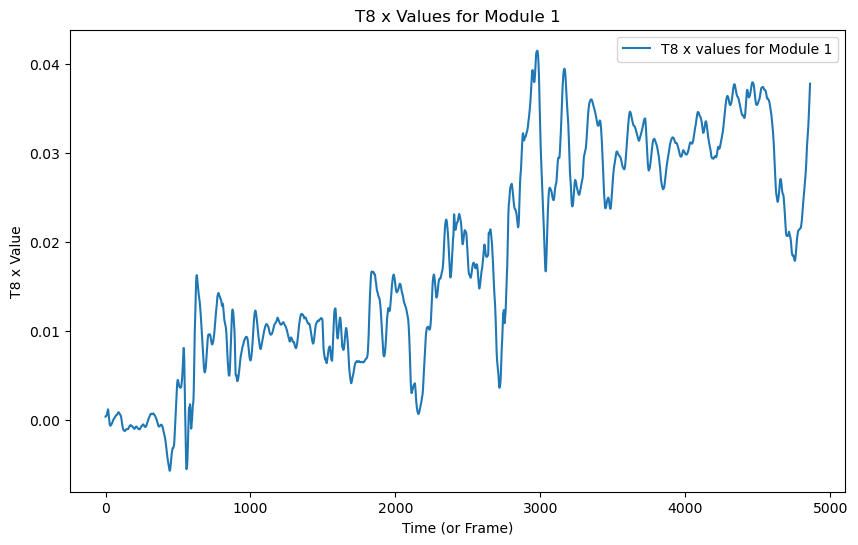

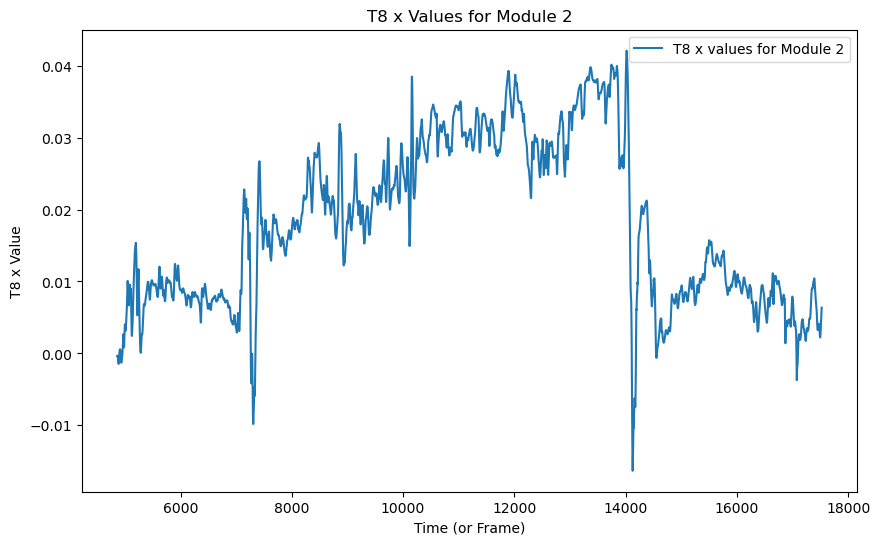

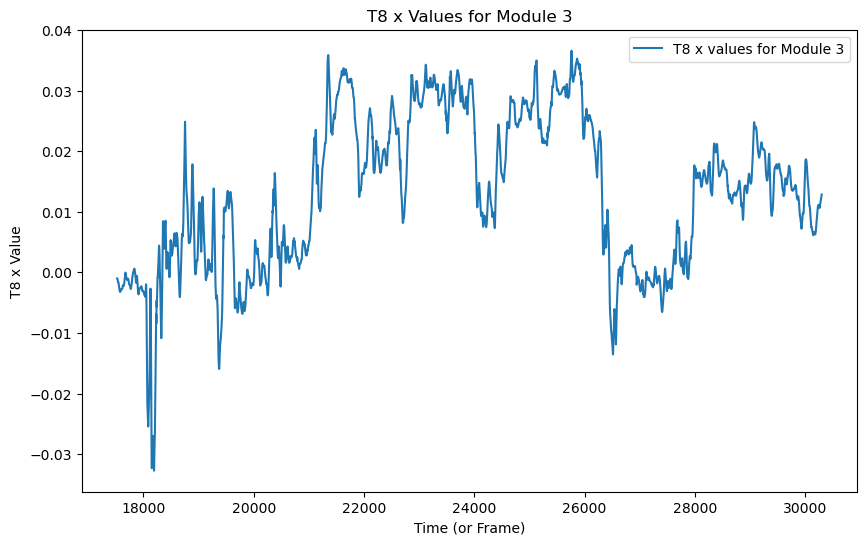

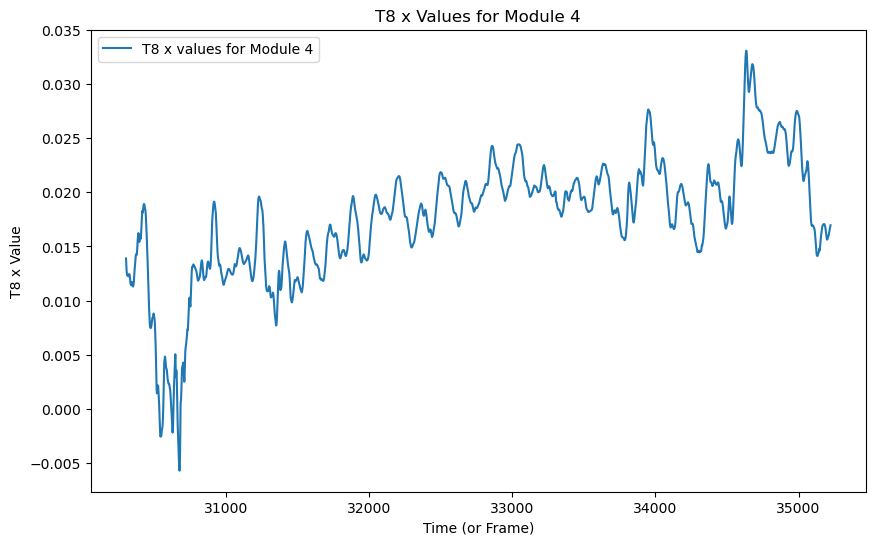

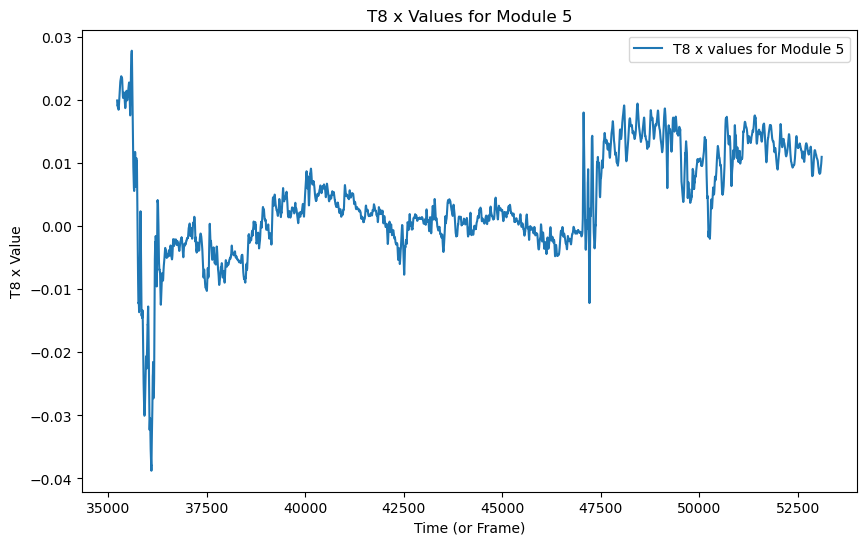

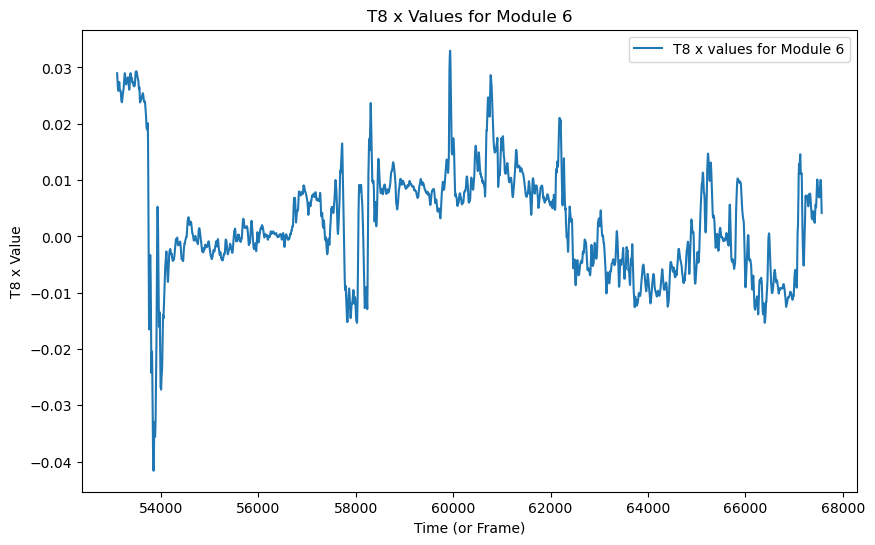

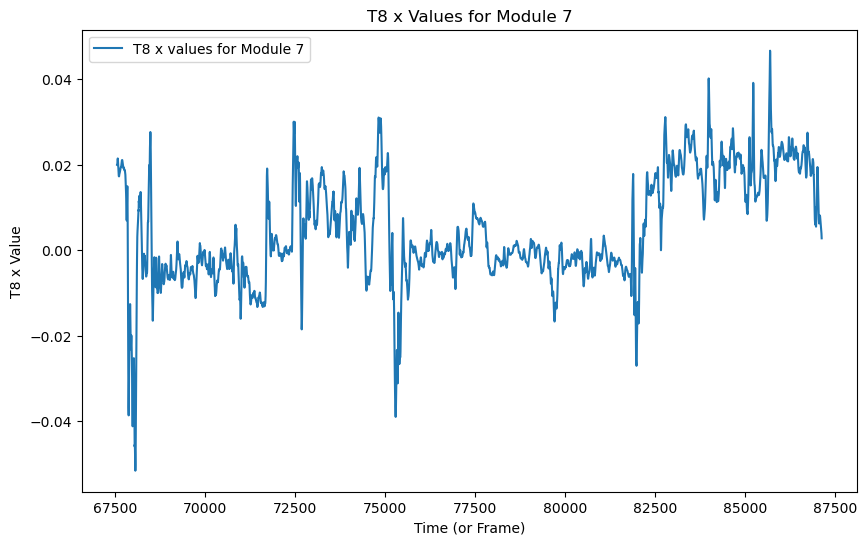

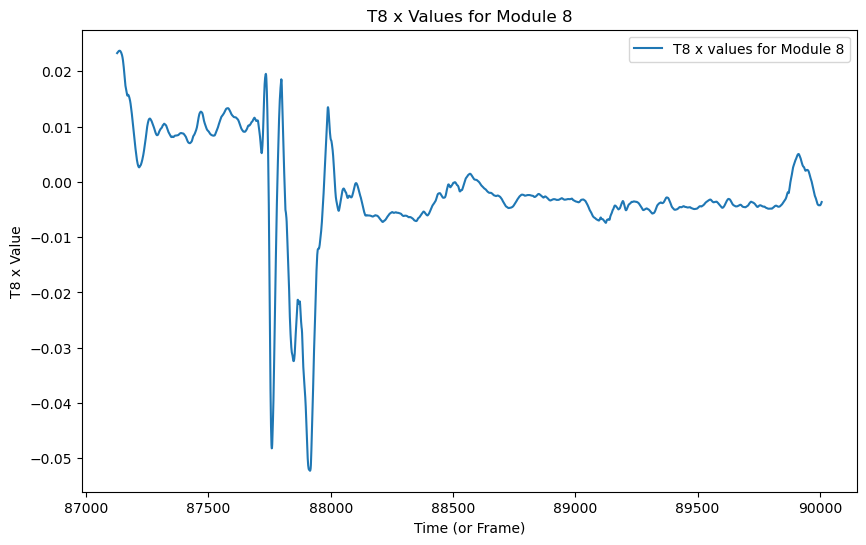

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the Excel file
df = pd.read_excel('sampletestpos.xlsx')

# Check if 'Module' column exists in the dataframe
if 'Module' in df.columns:
    
    modules = df['Module'].unique()
    
    # Iterate over each unique module and plot the 'T8 x' values
    for module in modules:
        plt.figure(figsize=(10, 6))
        
        subset = df[df['Module'] == module]
        
        plt.plot(subset['T8 x'], label=f'T8 x values for {module}')
        plt.title(f'T8 x Values for {module}')
        plt.xlabel('Time (or Frame)')
        plt.ylabel('T8 x Value')
        plt.legend()
        
        plt.show()

else:
    print("Module column not found in the dataset.")


-0.009658748205042143


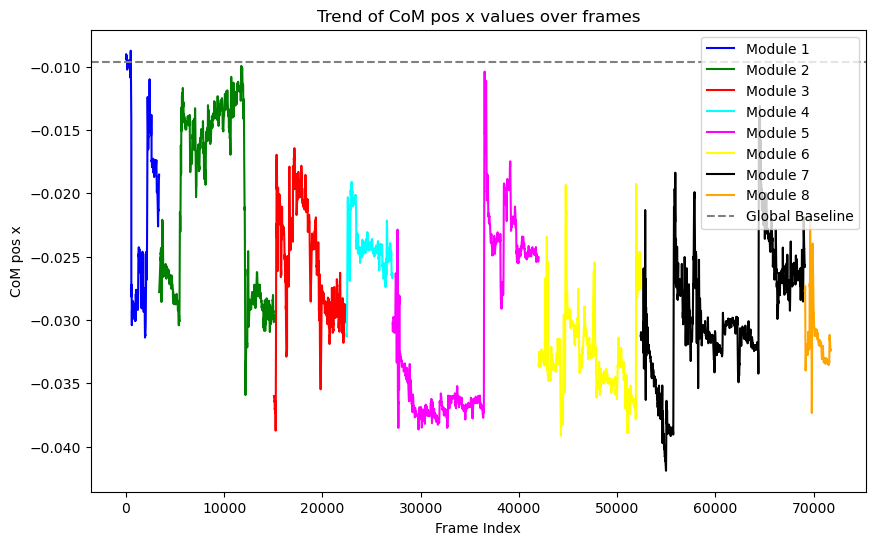

In [63]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','1_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [64]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','1_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    # Sort deviations in descending order and take top x differences
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    # Return the average of the top x deviations as max deviation
    return top_x_deviations.mean()

# Example usage:
x = 240  # or any number of frames you want to consider
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize to a scale of [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='1_2_adjustmax', index=False)


print("Data appended in a new sheet '1_2' in 'sampletest_updated.xlsx'")

# Now, you can compute the average slouching scores for each module
average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet '1_2' in 'sampletest_updated.xlsx'
Module
Module 1    63.212271
Module 2    65.483047
Module 3    48.799699
Module 4    53.561756
Module 5    30.696000
Module 6    25.822268
Module 7    35.476504
Module 8    29.845084
Name: slouching_score, dtype: float64


-0.009658748205042143
Module
Module 1    64.457251
Module 2    66.651179
Module 3    50.532433
Module 4    55.133331
Module 5    33.041404
Module 6    28.332609
Module 7    37.660125
Module 8    32.219285
Name: slouching_score, dtype: float64


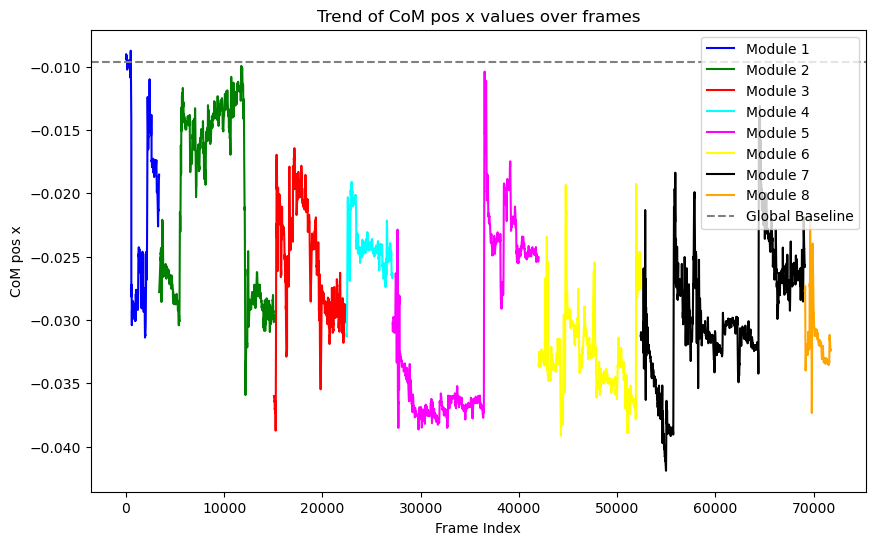

In [23]:
import matplotlib.pyplot as plt

# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [ ]:
3_2

-0.0032612453141294914


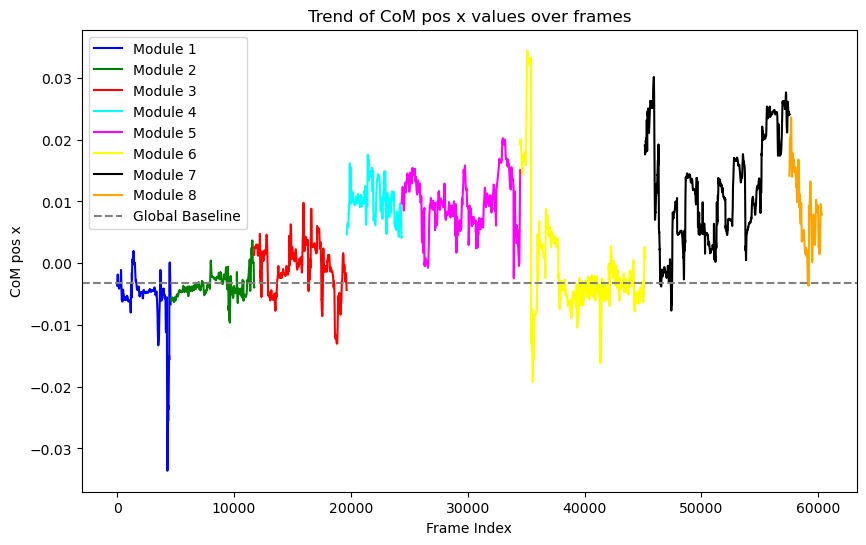

In [65]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','3_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [67]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','3_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    # Sort deviations in descending order and take top x differences
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    # Return the average of the top x deviations as max deviation
    return top_x_deviations.mean()

# Example usage:
x = 240  # or any number of frames you want to consider
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize to a scale of [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='3_2_adjustmax', index=False)


print("Data appended in a new sheet '3_2' in 'sampletest_updated.xlsx'")

# Now, you can compute the average slouching scores for each module
average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet '3_2' in 'sampletest_updated.xlsx'
Module
Module 1    92.102887
Module 2    96.191916
Module 3    89.150334
Module 4    62.977836
Module 5    64.351059
Module 6    85.863556
Module 7    58.633273
Module 8    67.953685
Name: slouching_score, dtype: float64


In [66]:
8_2

82

-0.004968533036401167


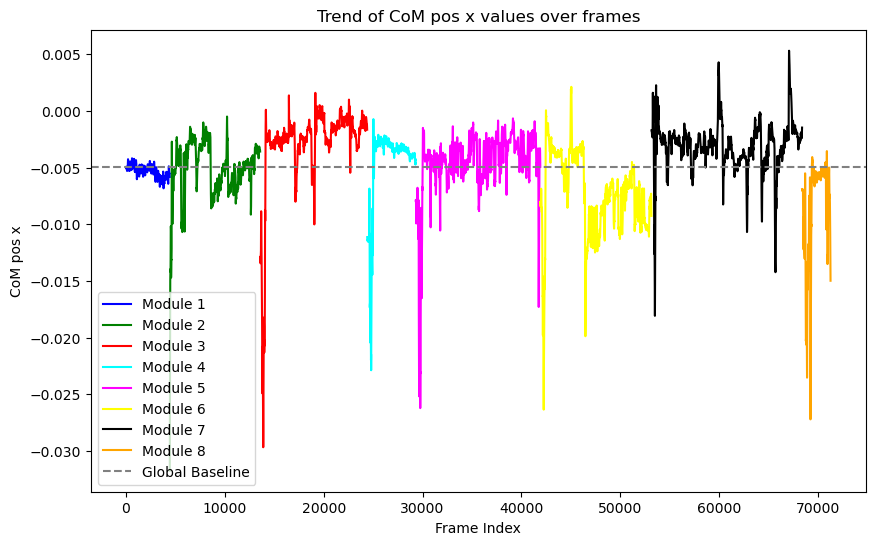

In [60]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','8_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [61]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','8_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    # Sort deviations in descending order and take top x differences
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    # Return the average of the top x deviations as max deviation
    return top_x_deviations.mean()

# Example usage:
x = 240  # or any number of frames you want to consider
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize to a scale of [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='8_2', index=False)


print("Data appended in a new sheet '8_2' in 'sampletest_updated.xlsx'")


Data appended in a new sheet '8_2' in 'sampletest_updated.xlsx'


In [62]:
# Now, you can compute the average slouching scores for each module
average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)

Module
Module 1    97.499624
Module 2    91.310743
Module 3    83.032903
Module 4    87.681395
Module 5    90.844805
Module 6    84.157027
Module 7    88.708502
Module 8    82.678574
Name: slouching_score, dtype: float64


In [31]:
6_2

62

-0.005179528400664216


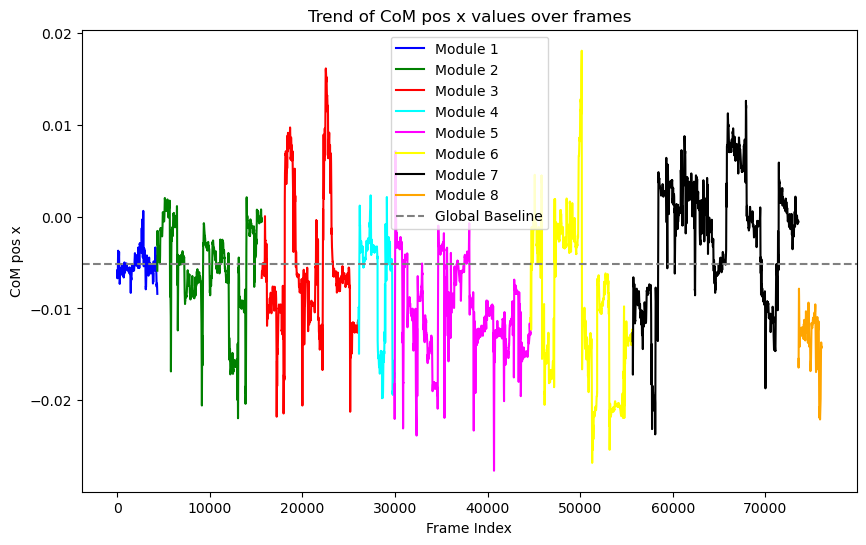

In [56]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','6_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [180]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','6_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 10
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    # Sort deviations in descending order and take top x differences
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    # Return the average of the top x deviations as max deviation
    return top_x_deviations.mean()

# Example usage:
x = 600  # or any number of frames you want to consider
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize to a scale of [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='6_2_adjustmax', index=False)


print("Data appended in a new sheet '6_2' in 'sampletest_updated.xlsx'")


Data appended in a new sheet '6_2' in 'sampletest_updated.xlsx'


In [181]:
# Now, you can compute the average slouching scores for each module
average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)

Module
Module 1    95.338898
Module 2    80.366882
Module 3    72.109182
Module 4    76.810827
Module 5    71.217282
Module 6    59.949170
Module 7    66.715799
Module 8    61.219972
Name: slouching_score, dtype: float64


In [59]:
print(max_deviation)

0.02095039106831451


In [37]:
13_2

132

0.0036343721583173127


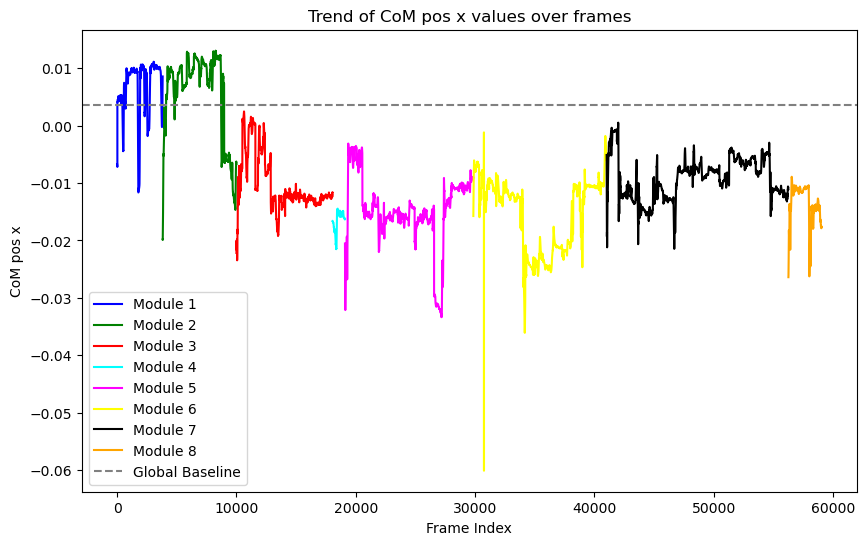

In [39]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','13_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [54]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','13_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    # Sort deviations in descending order and take top x differences
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    # Return the average of the top x deviations as max deviation
    return top_x_deviations.mean()

# Example usage:
x = 240  # or any number of frames you want to consider
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize to a scale of [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='13_2_adjustmax', index=False)


print("Data appended in a new sheet '13_2' in 'sampletest_updated.xlsx'")


Data appended in a new sheet '13_2' in 'sampletest_updated.xlsx'


In [55]:
# Now, you can compute the average slouching scores for each module
average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)

Module
Module 1    86.130569
Module 2    81.495635
Module 3    62.398829
Module 4    45.591505
Module 5    50.135387
Module 6    48.107296
Module 7    65.301341
Module 8    53.682971
Name: slouching_score, dtype: float64


In [68]:
5_2 

52

-0.0013394166666666667


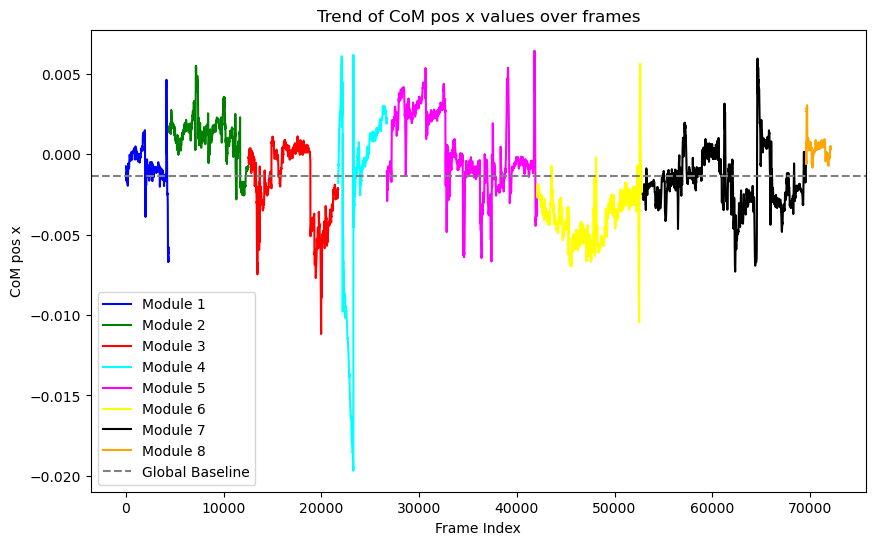

In [69]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','5_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [70]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','5_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    return top_x_deviations.mean()

x = 240  
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize  [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='5_2', index=False)


print("Data appended in a new sheet '5_2' in 'sampletest_updated.xlsx'")

average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet '5_2' in 'sampletest_updated.xlsx'
Module
Module 1    94.032869
Module 2    84.676048
Module 3    88.234724
Module 4    74.344804
Module 5    86.858272
Module 6    83.273055
Module 7    91.690826
Module 8    89.835361
Name: slouching_score, dtype: float64


-0.0027031393882498544


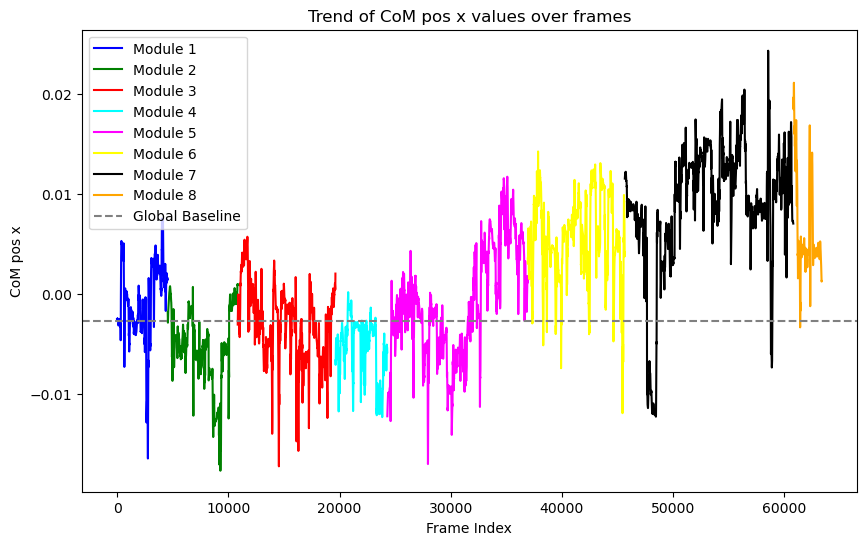

In [105]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','9_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [106]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','9_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    return top_x_deviations.mean()

x = 240  
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize  [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='9_2', index=False)


print("Data appended in a new sheet '9_2' in 'sampletest_updated.xlsx'")

average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet '9_2' in 'sampletest_updated.xlsx'
Module
Module 1    85.708756
Module 2    84.042506
Module 3    86.673649
Module 4    87.316677
Module 5    80.161615
Module 6    62.602210
Module 7    44.545280
Module 8    60.185964
Name: slouching_score, dtype: float64


-0.009488726778774903


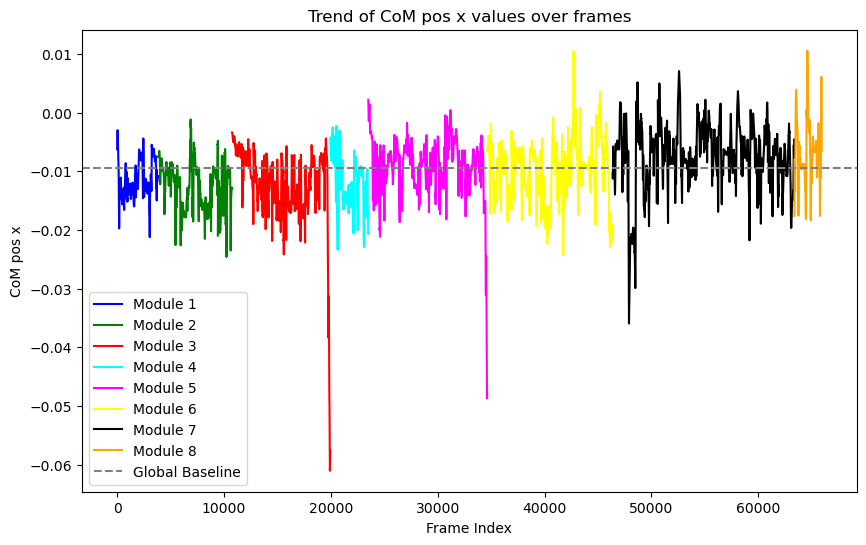

In [152]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','19_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [153]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','19_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    return top_x_deviations.mean()

x = 240  
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize  [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='19_2', index=False)


print("Data appended in a new sheet '19_2' in 'sampletest_updated.xlsx'")

average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet '19_2' in 'sampletest_updated.xlsx'
Module
Module 1    91.449316
Module 2    89.394572
Module 3    88.291820
Module 4    89.538105
Module 5    90.999117
Module 6    89.564940
Module 7    87.667838
Module 8    87.797436
Name: slouching_score, dtype: float64


In [ ]:
15_2

-0.00707961221656239


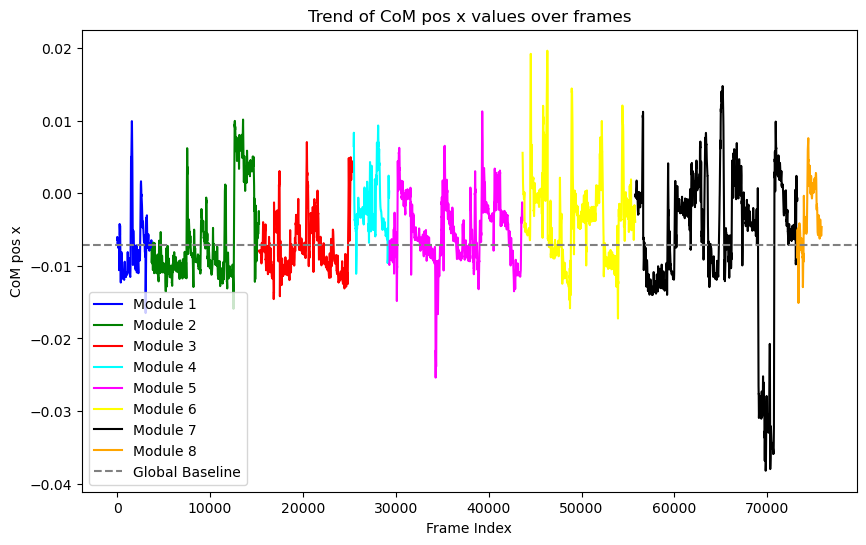

In [188]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','15_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [189]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','15_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 10
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    return top_x_deviations.mean()

x = 600
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize  [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='15_2', index=False)


print("Data appended in a new sheet 'mad2' in 'sampletest_updated.xlsx'")

average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet 'mad2' in 'sampletest_updated.xlsx'
Module
Module 1    89.649079
Module 2    83.773713
Module 3    89.062573
Module 4    77.057607
Module 5    85.297516
Module 6    78.709778
Module 7    71.498818
Module 8    79.096285
Name: slouching_score, dtype: float64


In [ ]:
18_2

In [193]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','18_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 15
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    return top_x_deviations.mean()

x = 900
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize  [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='18_2', index=False)


print("Data appended in a new sheet '18' in 'sampletest_updated.xlsx'")

average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet '18' in 'sampletest_updated.xlsx'
Module
Module 1    82.444357
Module 2    63.905323
Module 3    61.950254
Module 4    67.698448
Module 5    58.482767
Module 6    59.411802
Module 7    53.218124
Module 8    26.229955
Name: slouching_score, dtype: float64


0.010154134454624205


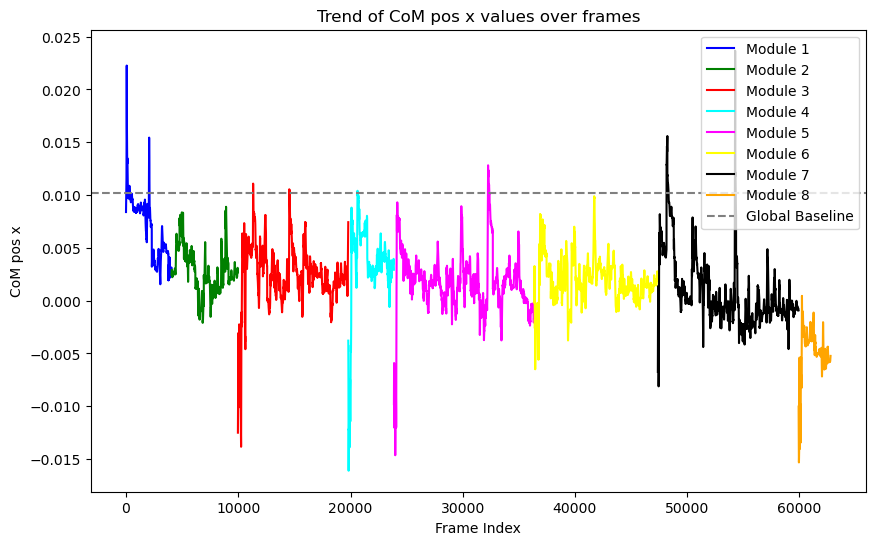

In [194]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','18_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [290]:
17_2

172

In [291]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','17_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    return top_x_deviations.mean()

x = 240  
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize  [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='17_2', index=False)


print("Data appended in a new sheet 'mad2' in 'sampletest_updated.xlsx'")

average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet 'mad2' in 'sampletest_updated.xlsx'
Module
Module 1    97.745353
Module 2    96.592591
Module 3    92.162816
Module 4    97.954549
Module 5    90.391957
Module 6    95.429092
Module 7    94.386899
Module 8    66.821154
Name: slouching_score, dtype: float64


-0.0024284308035855597


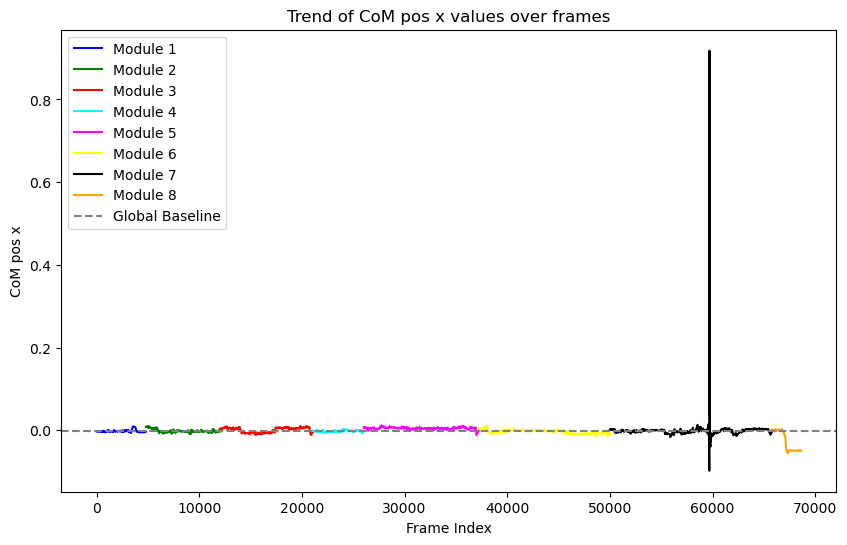

In [292]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','17_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [293]:
4_2

42

In [294]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','4_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    return top_x_deviations.mean()

x = 240  
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize  [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='4_2', index=False)


print("Data appended in a new sheet '4_2' in 'sampletest_updated.xlsx'")

average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet '4_2' in 'sampletest_updated.xlsx'
Module
Module 1    83.574509
Module 2    88.272341
Module 3    86.089262
Module 4    87.486440
Module 5    86.083802
Module 6    83.505562
Module 7    69.241786
Module 8    92.091462
Name: slouching_score, dtype: float64


-0.01987449793152241


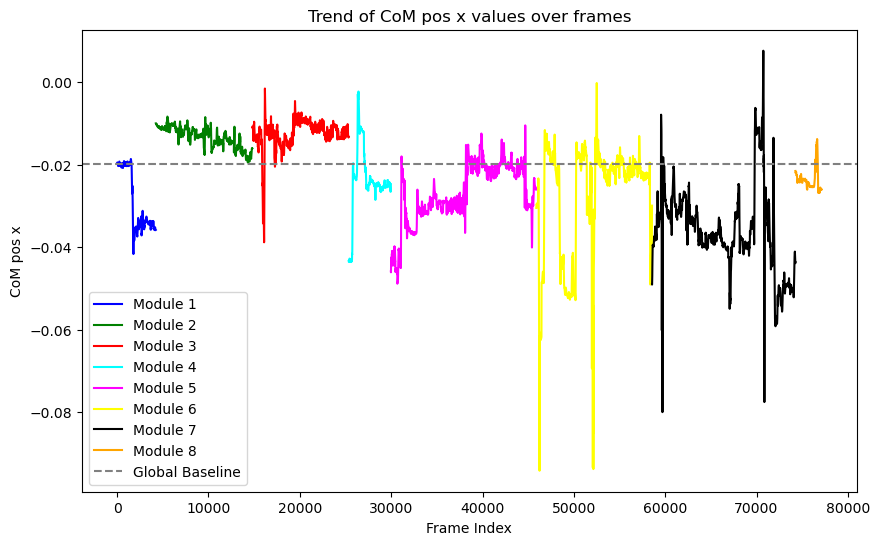

In [295]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','4_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


## MAD_2

0.0153238125


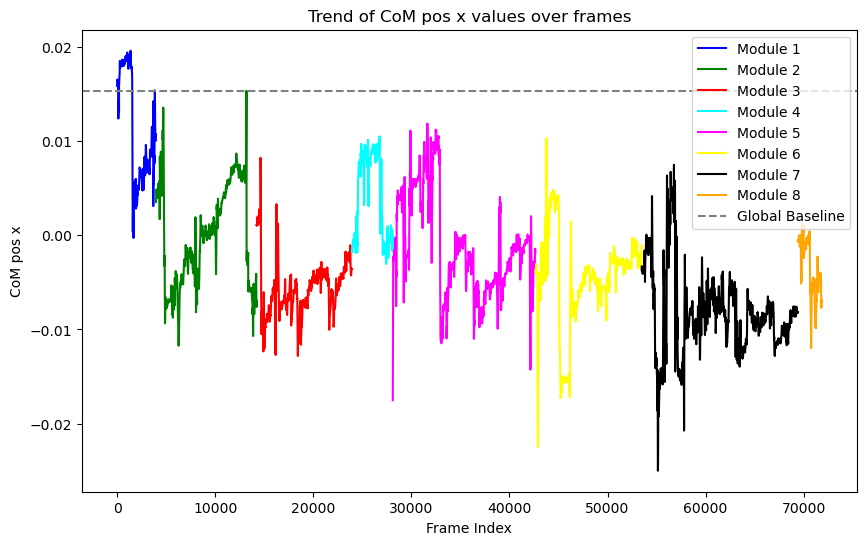

In [43]:
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','mad2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [45]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','mad2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    return top_x_deviations.mean()

x = 240  
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize  [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='mad2', index=False)


print("Data appended in a new sheet 'mad2' in 'sampletest_updated.xlsx'")

average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet 'mad2' in 'sampletest_updated.xlsx'
Module
Module 1    82.089467
Module 2    56.481422
Module 3    40.430731
Module 4    68.991772
Module 5    53.138568
Module 6    44.012869
Module 7    33.525161
Module 8    46.989843
Name: slouching_score, dtype: float64


Estimated PD values: [100.0, 92.85714285714286, 85.71428571428571, 78.57142857142857, 71.42857142857143, 64.28571428571428, 57.14285714285714, 50.0]
Pearson correlation coefficient between PD values and slouching scores: 0.6708237882484825
Spearman rank correlation coefficient between PD values and slouching scores: 0.6190476190476191


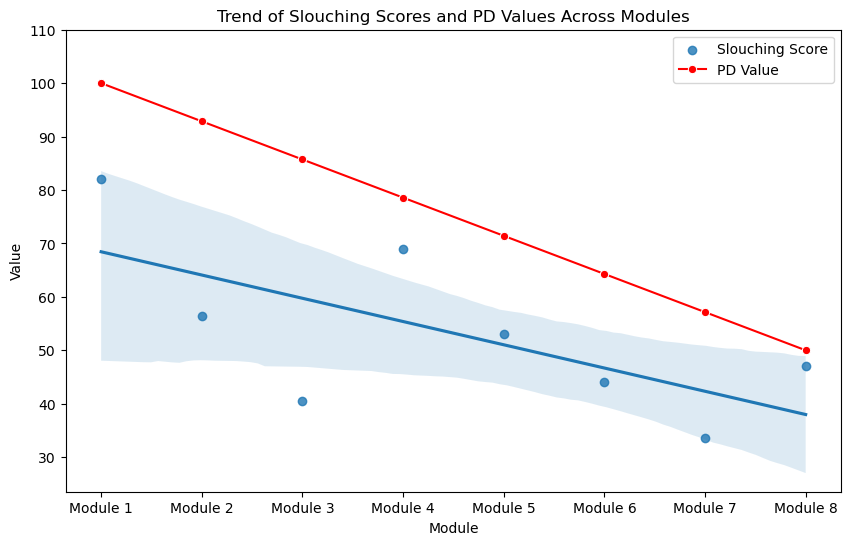

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Average slouching scores data
data = {
    'Module': ['Module 1', 'Module 2', 'Module 3', 'Module 4', 'Module 5', 'Module 6', 'Module 7', 'Module 8'],
    'slouching_score': [82.089467, 56.481422, 40.430731, 68.991772, 53.138568, 44.012869, 33.525161, 46.989843] # Replace None with your value for Module 8
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Specify your NASA TLX score here
nasa_tlx_score = 50  # Example NASA TLX score for the last module

# Generate decreasing PD values from 100 to the NASA TLX score
df['PD_value'] = np.linspace(100, nasa_tlx_score, num=len(df['Module']))

# Calculate Pearson correlation coefficient between PD values and slouching scores
pearson_correlation = df['PD_value'].corr(df['slouching_score'], method='pearson')

# Calculate Spearman rank correlation coefficient between PD values and slouching scores
spearman_correlation = df['PD_value'].corr(df['slouching_score'], method='spearman')

print(f"Estimated PD values: {df['PD_value'].tolist()}")
print(f"Pearson correlation coefficient between PD values and slouching scores: {pearson_correlation}")
print(f"Spearman rank correlation coefficient between PD values and slouching scores: {spearman_correlation}")

# Plotting the data with a linear regression line for slouching scores
plt.figure(figsize=(10, 6))
sns.regplot(x=np.arange(len(df)), y='slouching_score', data=df, label='Slouching Score')

# Creating a secondary y-axis for PD values
# Removed the secondary y-axis because we are plotting on the same y-axis now.

# Plot PD values on the same axis as the slouching scores
sns.lineplot(x=np.arange(len(df)), y='PD_value', data=df, color='r', label='PD Value', marker='o')

# Setting the y-axis range to include both PD values and slouching scores
plt.ylim(min(df['PD_value'].min(), df['slouching_score'].min()) - 10, max(df['PD_value'].max(), df['slouching_score'].max()) + 10)

# Add title and labels
plt.title('Trend of Slouching Scores and PD Values Across Modules')
plt.xticks(ticks=np.arange(len(df)), labels=df['Module'])
plt.xlabel('Module')
plt.ylabel('Value')  # Changed to 'Value' since both PD values and slouching scores are on the same axis

# Add legend
plt.legend()

plt.show()


In [54]:
import statsmodels.api as sm

# Define your independent variables (adding a constant for the intercept)
X = sm.add_constant(df['PD_value'])  # Predictor (independent variable)
Y = df['slouching_score']            # Response (dependent variable)

# Fit the model
model = sm.OLS(Y, X).fit()

# Get the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        slouching_score   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     4.909
Date:                Mon, 06 Nov 2023   Prob (F-statistic):             0.0686
Time:                        11:46:14   Log-Likelihood:                -30.552
No. Observations:                   8   AIC:                             65.10
Df Residuals:                       6   BIC:                             65.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5093     21.110      0.356      0.7

/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0.6708237882484825
Estimated PD values: [100.0, 92.85714285714286, 85.71428571428571, 78.57142857142857, 71.42857142857143, 64.28571428571428, 57.14285714285714, 50.0]
Pearson correlation coefficient between PD values and slouching scores: 0.6708237882484825
Spearman rank correlation coefficient between PD values and slouching scores: 0.6190476190476191


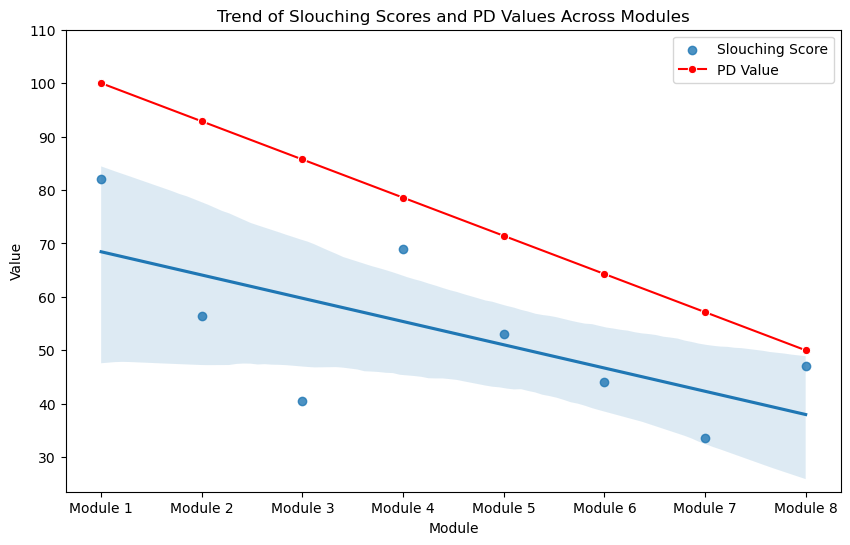

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Average slouching scores data
data = {
    'Module': ['Module 1', 'Module 2', 'Module 3', 'Module 4', 'Module 5', 'Module 6', 'Module 7', 'Module 8'],
    'slouching_score': [82.089467, 56.481422, 40.430731, 68.991772, 53.138568, 44.012869, 33.525161, 46.989843] # Replace None with your value for Module 8
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

X = df['slouching_score']
nasa_tlx_score = 50  # Example NASA TLX score for the last module

# Generate decreasing PD values from 100 to the NASA TLX score
df['PD_value'] = np.linspace(100, nasa_tlx_score, num=len(df['Module']))
Y = df['PD_value']
correlation_coefficient = np.corrcoef(X, Y)[0, 1]

print(correlation_coefficient)

pearson_correlation = df['PD_value'].corr(df['slouching_score'], method='pearson')

spearman_correlation = df['PD_value'].corr(df['slouching_score'], method='spearman')

print(f"Estimated PD values: {df['PD_value'].tolist()}")
print(f"Pearson correlation coefficient between PD values and slouching scores: {pearson_correlation}")
print(f"Spearman rank correlation coefficient between PD values and slouching scores: {spearman_correlation}")

# Plotting the data with a linear regression line for slouching scores
plt.figure(figsize=(10, 6))
sns.regplot(x=np.arange(len(df)), y='slouching_score', data=df, label='Slouching Score')


sns.lineplot(x=np.arange(len(df)), y='PD_value', data=df, color='r', label='PD Value', marker='o')

plt.ylim(min(df['PD_value'].min(), df['slouching_score'].min()) - 10, max(df['PD_value'].max(), df['slouching_score'].max()) + 10)

plt.title('Trend of Slouching Scores and PD Values Across Modules')
plt.xticks(ticks=np.arange(len(df)), labels=df['Module'])
plt.xlabel('Module')
plt.ylabel('Value')  
plt.legend()

plt.show()


In [52]:
import statsmodels.api as sm

# Define your independent variables (adding a constant for the intercept)
X = sm.add_constant(df['PD_value'])  # Predictor (independent variable)
Y = df['slouching_score']            # Response (dependent variable)

# Fit the model
model = sm.OLS(Y, X).fit()

# Get the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        slouching_score   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     4.909
Date:                Mon, 06 Nov 2023   Prob (F-statistic):             0.0686
Time:                        11:45:47   Log-Likelihood:                -30.552
No. Observations:                   8   AIC:                             65.10
Df Residuals:                       6   BIC:                             65.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5897      9.532      3.629      0.0

/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [1]:
11_2


112

0.004955023120170537


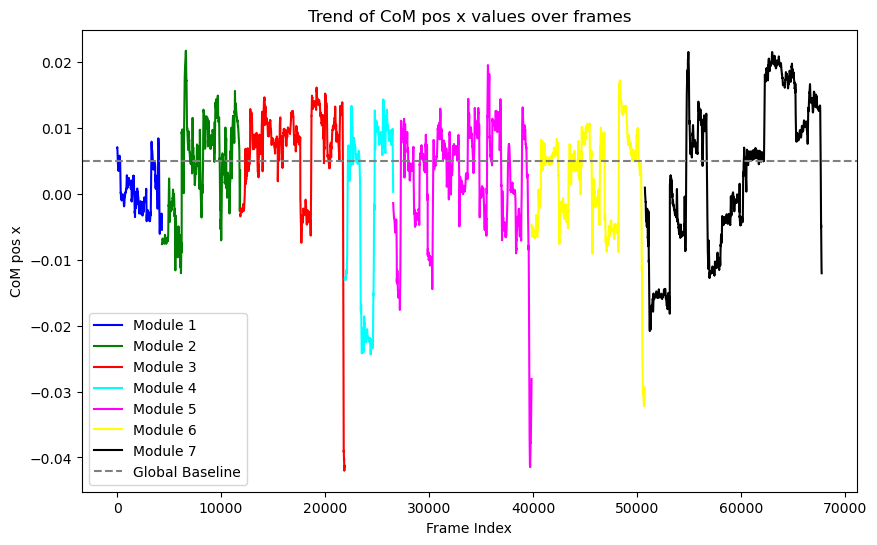

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest_updated.xlsx','11_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [6]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest_updated.xlsx','11_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    # Sort deviations in descending order and take top x differences
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    # Return the average of the top x deviations as max deviation
    return top_x_deviations.mean()

# Example usage:
x = 240  # or any number of frames you want to consider
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize to a scale of [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='11_2_updated', index=False)


print("Data appended in a new sheet '11_2' in 'sampletest_updated.xlsx'")

average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet '11_2' in 'sampletest_updated.xlsx'
Module
Module 1    88.874548
Module 2    86.947277
Module 3    87.499458
Module 4    76.489670
Module 5    86.409938
Module 6    87.145274
Module 7    78.270023
Name: slouching_score, dtype: float64


In [156]:
2_2

22

-0.002443977759830179


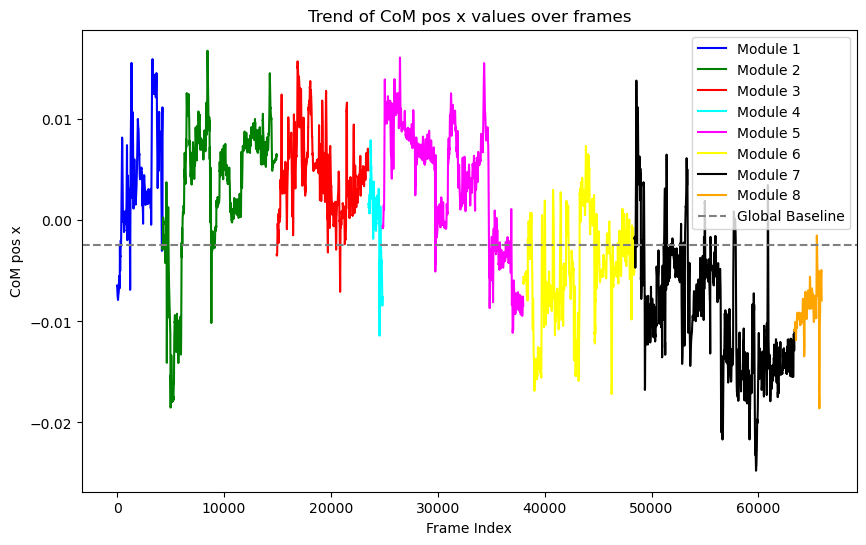

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','2_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [178]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','2_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 15
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    return top_x_deviations.mean()

x = 240  
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize  [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='2_2', index=False)


print("Data appended in a new sheet '2_2' in 'sampletest_updated.xlsx'")

average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet '2_2' in 'sampletest_updated.xlsx'
Module
Module 1    69.508533
Module 2    64.991672
Module 3    71.086552
Module 4    84.042285
Module 5    67.525464
Module 6    77.962264
Module 7    60.070861
Module 8    67.145569
Name: slouching_score, dtype: float64


In [183]:
10_2

102

In [185]:
import pandas as pd

# Load the original dataset
df = pd.read_excel('sampletest.xlsx','10_2')

# Grouping data into groups of 60 frames and by 'Module' column
df['group'] = (df.groupby('Module').cumcount() // 60) + 1

# Decide on the baseline duration
baseline_duration_sec = 4
baseline_duration_rows = baseline_duration_sec * 60  # Assuming one row per second

# Establish the baseline using the average of the first few minutes of Module 1
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()

def compute_max_deviation(df, global_baseline_com_x, x):
    # Calculate the absolute deviation for each frame
    df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
    top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
    return top_x_deviations.mean()

x = 240  
max_deviation = compute_max_deviation(df, global_baseline_com_x, x)


def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize  [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score


# Apply the function to each row
df['slouching_score'] = df.apply(compute_slouching_score, axis=1)

# Calculate average slouching score for each group and assign to 'average' column
df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

# Set 'average' values to NaN except for the last row of each group
group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
df.loc[~df.index.isin(group_last_row_indices), 'average'] = None



# Save the updated dataframe to a new sheet in the existing Excel file
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name='10_2', index=False)


print("Data appended in a new sheet '10_2' in 'sampletest_updated.xlsx'")

average_scores = df.groupby('Module')['slouching_score'].mean()

print(average_scores)


Data appended in a new sheet '10_2' in 'sampletest_updated.xlsx'
Module
Module 1    94.366791
Module 2    80.346974
Module 3    58.823986
Module 4    53.003482
Module 5    66.051504
Module 6    64.406242
Module 7    63.660216
Module 8    76.762108
Name: slouching_score, dtype: float64


0.0014363782424057809


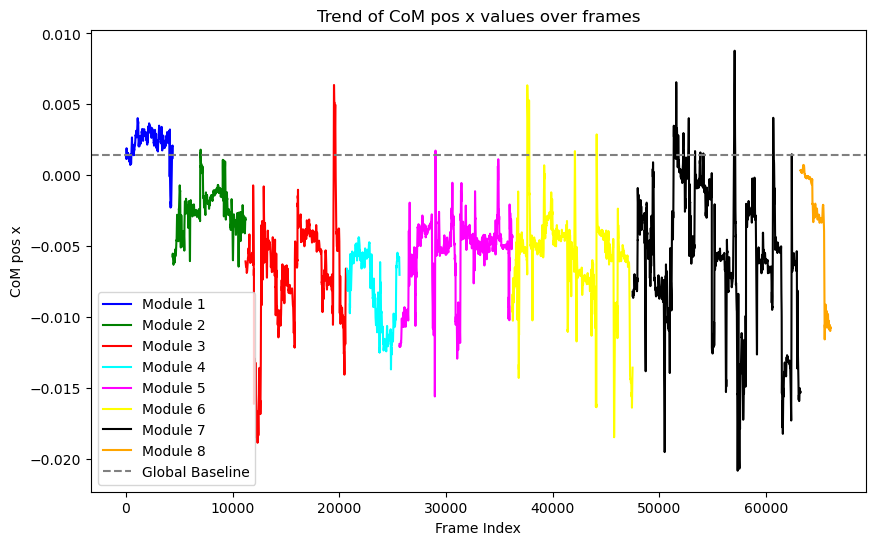

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('sampletest.xlsx','10_2')
global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
print(global_baseline_com_x)
# Unique list of modules
modules = df['Module'].unique()

# Define a color list. If you have more modules, add more colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(10, 6))

# Plotting CoM pos x values for each module
for module, color in zip(modules, colors):
    module_df = df[df['Module'] == module]
    plt.plot(module_df.index, module_df['CoM pos x'], label=module, color=color)

plt.axhline(y=global_baseline_com_x, color='grey', linestyle='--', label='Global Baseline')
plt.title('Trend of CoM pos x values over frames')
plt.xlabel('Frame Index')
plt.ylabel('CoM pos x')
plt.legend()
plt.show()


In [4]:
import pandas as pd

def compute_slouching_score(row):
    deviation_com_x = abs(row['CoM pos x'] - global_baseline_com_x)
    
    # Normalize to a scale of [0, 100]
    normalized_score = 100 * (1 - (deviation_com_x / max_deviation))

    return normalized_score

# Load the list of sheet names from the original Excel file
xls = pd.ExcelFile('sampletest.xlsx')
sheet_names = xls.sheet_names

# Ensure that there are sheets in the source Excel file
if not sheet_names:
    raise ValueError("The source Excel file does not contain any sheets.")

# Initialize the output Excel writer
with pd.ExcelWriter('sampletest_updated.xlsx', engine='openpyxl') as writer:
    # Loop through all sheet names
    for i, sheet in enumerate(sheet_names):
        # Load data from the current sheet
        df = pd.read_excel('sampletest.xlsx', sheet)

        # Grouping data into groups of 60 frames and by 'Module' column
        df['group'] = (df.groupby('Module').cumcount() // 60) + 1

        # Decide on the baseline duration
        baseline_duration_sec = 4
        baseline_duration_rows = baseline_duration_sec * 60

        # Establish the baseline using the average of the first few minutes of Module 1
        global_baseline_com_x = df[df['Module'] == "Module 1"]['CoM pos x'].iloc[:baseline_duration_rows].mean()
        
        def compute_max_deviation(df, global_baseline_com_x, x):
            # Calculate the absolute deviation for each frame
            df['deviation_from_baseline'] = df['CoM pos x'].apply(lambda val: abs(val - global_baseline_com_x))
    
            # Sorting deviations in descending order and take top x differences
            top_x_deviations = df['deviation_from_baseline'].nlargest(x)
    
            # Return the average of the top x deviations as max deviation
            return top_x_deviations.mean()

        # Calculate max deviation
        x = 240
        max_deviation = compute_max_deviation(df, global_baseline_com_x, x)

        # Calculate slouching score and average slouching score for each group
        df['slouching_score'] = df.apply(compute_slouching_score, axis=1)
        df['average'] = df.groupby(['Module', 'group'])['slouching_score'].transform('mean')

        # Set 'average' values to NaN except for the last row of each group
        group_last_row_indices = df.groupby(['Module', 'group']).tail(1).index
        df.loc[~df.index.isin(group_last_row_indices), 'average'] = None

        # Save the processed dataframe to a new sheet in the output Excel file
        new_sheet_name = sheet + '_adjustedmax'
        df.to_excel(writer, sheet_name=new_sheet_name, index=False)
        
        # If it's the first sheet being written, ensure it's visible
        if i == 0:
            writer.sheets[new_sheet_name].sheet_state = 'visible'

        # Print the sheet processing completion message
        print(f"Data appended in a new sheet '{new_sheet_name}' in 'sampletest_updated.xlsx'")
        
        # Print the average slouching scores for each module in the current data sheet
        average_scores = df.groupby('Module')['slouching_score'].mean()
        print(f"Average slouching scores for data sheet {sheet}:\n{average_scores}\n")


Data appended in a new sheet '1_2_adjustedmax' in 'sampletest_updated.xlsx'
Average slouching scores for data sheet 1_2:
Module
Module 1    63.212271
Module 2    65.483047
Module 3    48.799699
Module 4    53.561756
Module 5    30.696000
Module 6    25.822268
Module 7    35.476504
Module 8    29.845084
Name: slouching_score, dtype: float64

Data appended in a new sheet '3_2_adjustedmax' in 'sampletest_updated.xlsx'
Average slouching scores for data sheet 3_2:
Module
Module 1    92.102887
Module 2    96.191916
Module 3    89.150334
Module 4    62.977836
Module 5    64.351059
Module 6    85.863556
Module 7    58.633273
Module 8    67.953685
Name: slouching_score, dtype: float64

Data appended in a new sheet '8_2_adjustedmax' in 'sampletest_updated.xlsx'
Average slouching scores for data sheet 8_2:
Module
Module 1    97.499624
Module 2    91.310743
Module 3    83.032903
Module 4    87.681395
Module 5    90.844805
Module 6    84.157027
Module 7    88.708502
Module 8    82.678574
Name: slou

Estimated PD values: [100.0, 97.14285714285714, 94.28571428571429, 91.42857142857143, 88.57142857142857, 85.71428571428571, 82.85714285714286, 80.0]
Pearson correlation coefficient between PD values and slouching scores: 0.674093808078882
Spearman rank correlation coefficient between PD values and slouching scores: 0.7142857142857144


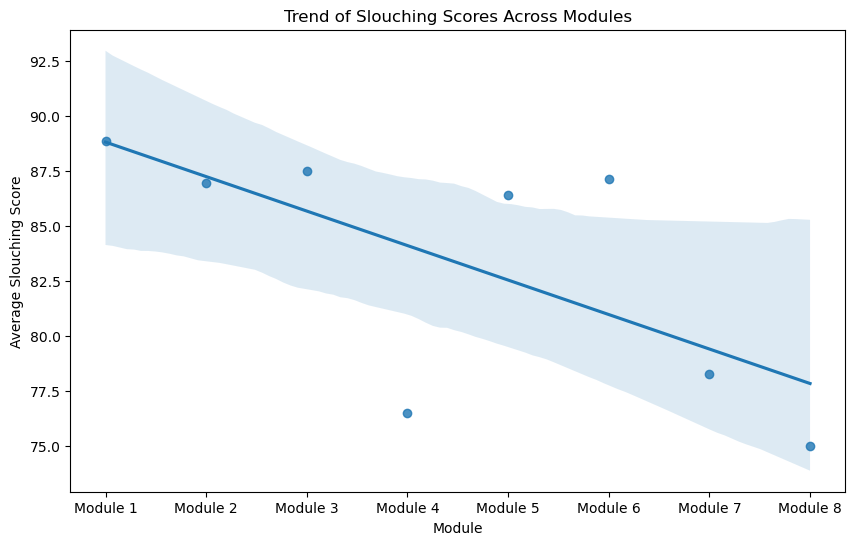

In [41]:
import pandas as pd
import numpy as np

# Average slouching scores data
data = {
    'Module': ['Module 1', 'Module 2', 'Module 3', 'Module 4', 'Module 5', 'Module 6', 'Module 7', 'Module 8'],
    'slouching_score': [88.874548, 86.947277, 87.499458, 76.489670, 86.409938, 87.145274, 78.270023, 75] # Replace None with your value for Module 8
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Specify your NASA TLX score here
nasa_tlx_score = 80  # Example NASA TLX score for the last module

# Generate decreasing PD values from 100 to the NASA TLX score
df['PD_value'] = np.linspace(100, nasa_tlx_score, num=len(df['Module']))

# Calculate Pearson correlation coefficient between PD values and slouching scores
pearson_correlation = df['PD_value'].corr(df['slouching_score'], method='pearson')

# Calculate Spearman rank correlation coefficient between PD values and slouching scores
spearman_correlation = df['PD_value'].corr(df['slouching_score'], method='spearman')

print(f"Estimated PD values: {df['PD_value'].tolist()}")
print(f"Pearson correlation coefficient between PD values and slouching scores: {pearson_correlation}")
print(f"Spearman rank correlation coefficient between PD values and slouching scores: {spearman_correlation}")

# Plotting the data with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df.index, y=df['slouching_score'], data=df)
plt.xticks(ticks=df.index, labels=df['Module'])
plt.title('Trend of Slouching Scores Across Modules')
plt.ylabel('Average Slouching Score')
plt.xlabel('Module')
plt.show()

Estimated PD values: [100.0, 94.28571428571429, 88.57142857142857, 82.85714285714286, 77.14285714285714, 71.42857142857143, 65.71428571428572, 60.0]
Pearson correlation coefficient between PD values and slouching scores: 0.7050272506530488
Spearman rank correlation coefficient between PD values and slouching scores: 0.6904761904761906


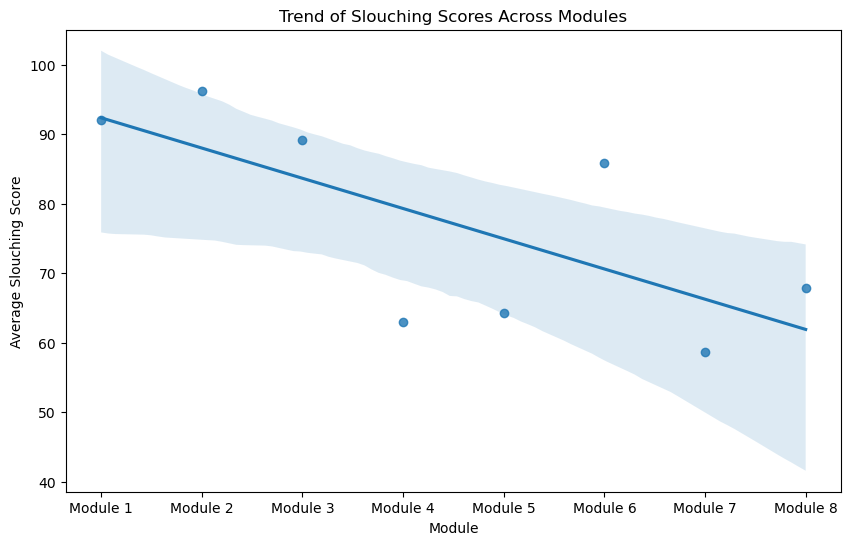

In [40]:
import pandas as pd
import numpy as np

# Average slouching scores data
data = {
    'Module': ['Module 1', 'Module 2', 'Module 3', 'Module 4', 'Module 5', 'Module 6', 'Module 7', 'Module 8'],
    'slouching_score': [92.102887, 96.191916, 89.150334, 62.977836, 64.351059, 85.863556, 58.633273, 67.953685]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Specify your NASA TLX score here
nasa_tlx_score = 60  # Example NASA TLX score for the last module

# Generate decreasing PD values from 100 to the NASA TLX score
df['PD_value'] = np.linspace(100, nasa_tlx_score, num=len(df['Module']))

# Calculate Pearson correlation coefficient between PD values and slouching scores
pearson_correlation = df['PD_value'].corr(df['slouching_score'], method='pearson')

# Calculate Spearman rank correlation coefficient between PD values and slouching scores
spearman_correlation = df['PD_value'].corr(df['slouching_score'], method='spearman')

print(f"Estimated PD values: {df['PD_value'].tolist()}")
print(f"Pearson correlation coefficient between PD values and slouching scores: {pearson_correlation}")
print(f"Spearman rank correlation coefficient between PD values and slouching scores: {spearman_correlation}")

# Plotting the data with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df.index, y=df['slouching_score'], data=df)
plt.xticks(ticks=df.index, labels=df['Module'])
plt.title('Trend of Slouching Scores Across Modules')
plt.ylabel('Average Slouching Score')
plt.xlabel('Module')
plt.show()

Estimated PD values: [100.0, 97.14285714285714, 94.28571428571429, 91.42857142857143, 88.57142857142857, 85.71428571428571, 82.85714285714286, 80.0]
Pearson correlation coefficient between PD values and slouching scores: -0.015904937051473993
Spearman rank correlation coefficient between PD values and slouching scores: 0.0


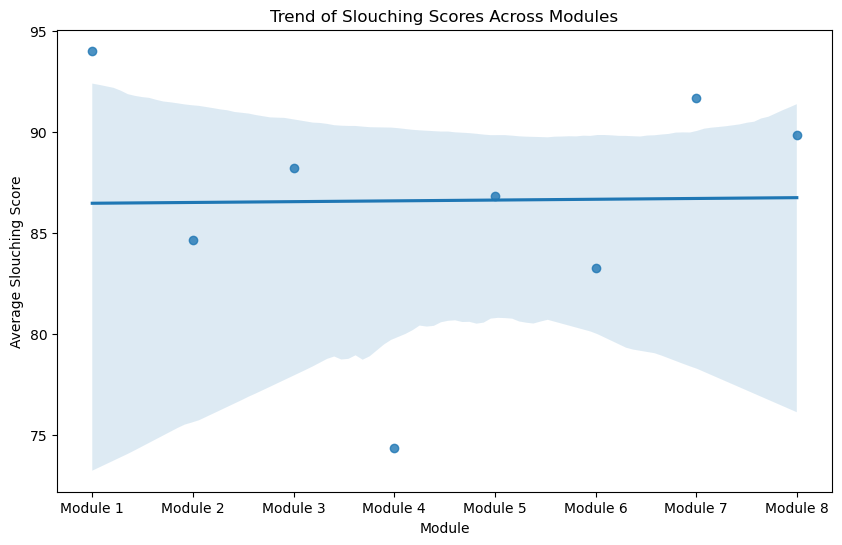

In [39]:
import pandas as pd
import numpy as np

# Average slouching scores data
data = {
    'Module': ['Module 1', 'Module 2', 'Module 3', 'Module 4', 'Module 5', 'Module 6', 'Module 7', 'Module 8'],
    'slouching_score': [94.032869, 84.676048, 88.234724, 74.344804, 86.858272, 83.273055, 91.690826, 89.835361]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Specify your NASA TLX score here
nasa_tlx_score = 80  # Example NASA TLX score for the last module

# Generate decreasing PD values from 100 to the NASA TLX score
df['PD_value'] = np.linspace(100, nasa_tlx_score, num=len(df['Module']))

# Calculate Pearson correlation coefficient between PD values and slouching scores
pearson_correlation = df['PD_value'].corr(df['slouching_score'], method='pearson')

# Calculate Spearman rank correlation coefficient between PD values and slouching scores
spearman_correlation = df['PD_value'].corr(df['slouching_score'], method='spearman')

print(f"Estimated PD values: {df['PD_value'].tolist()}")
print(f"Pearson correlation coefficient between PD values and slouching scores: {pearson_correlation}")
print(f"Spearman rank correlation coefficient between PD values and slouching scores: {spearman_correlation}")

# Plotting the data with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df.index, y=df['slouching_score'], data=df)
plt.xticks(ticks=df.index, labels=df['Module'])
plt.title('Trend of Slouching Scores Across Modules')
plt.ylabel('Average Slouching Score')
plt.xlabel('Module')
plt.show()

Estimated PD values: [100.0, 93.57142857142857, 87.14285714285714, 80.71428571428572, 74.28571428571428, 67.85714285714286, 61.42857142857143, 55.0]
Pearson correlation coefficient between PD values and slouching scores: 0.6591261313578033
Spearman rank correlation coefficient between PD values and slouching scores: 0.4761904761904762


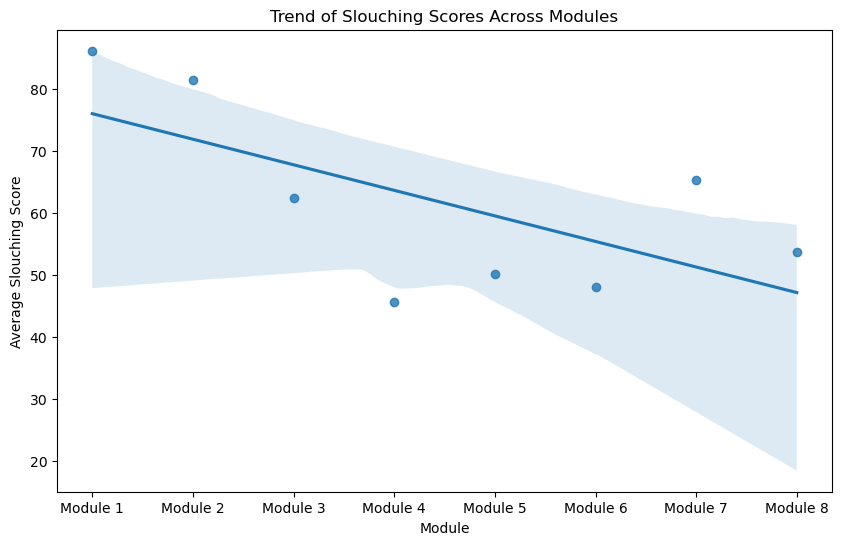

In [32]:
import pandas as pd
import numpy as np

# Average slouching scores data
data = {
    'Module': ['Module 1', 'Module 2', 'Module 3', 'Module 4', 'Module 5', 'Module 6', 'Module 7', 'Module 8'],
    'slouching_score': [86.130569, 81.495635, 62.398829, 45.591505, 50.135387, 48.107296, 65.301341, 53.682971]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Specify your NASA TLX score here
nasa_tlx_score = 55  # Example NASA TLX score for the last module

# Generate decreasing PD values from 100 to the NASA TLX score
df['PD_value'] = np.linspace(100, nasa_tlx_score, num=len(df['Module']))

# Calculate Pearson correlation coefficient between PD values and slouching scores
pearson_correlation = df['PD_value'].corr(df['slouching_score'], method='pearson')

# Calculate Spearman rank correlation coefficient between PD values and slouching scores
spearman_correlation = df['PD_value'].corr(df['slouching_score'], method='spearman')

print(f"Estimated PD values: {df['PD_value'].tolist()}")
print(f"Pearson correlation coefficient between PD values and slouching scores: {pearson_correlation}")
print(f"Spearman rank correlation coefficient between PD values and slouching scores: {spearman_correlation}")

# Plotting the data with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df.index, y=df['slouching_score'], data=df)
plt.xticks(ticks=df.index, labels=df['Module'])
plt.title('Trend of Slouching Scores Across Modules')
plt.ylabel('Average Slouching Score')
plt.xlabel('Module')
plt.show()

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Updated slouching scores
slouching_scores = [92.102887, 96.191916, 89.150334, 62.977836, 64.351059, 85.863556, 58.633273, 67.953685]

# NASA TLX value
nasa_tlx = [60]
# Create a DataFrame for the slouching scores - ensure your module names match your actual data
data = pd.DataFrame({
    'Module1': slouching_scores[0],
    'Module2': slouching_scores[1],
    'Module3': slouching_scores[2],
    'Module4': slouching_scores[3],
    'Module5': slouching_scores[4],
    'Module6': slouching_scores[5],
    'Module7': slouching_scores[6],
    'Module8': slouching_scores[7],
}, index=[0])

# Add the NASA TLX value as the target variable
data['nasa_tlx'] = nasa_tlx

# Independent variables (average slouching scores for each module)
X = data[['Module1', 'Module2', 'Module3', 'Module4', 'Module5', 'Module6', 'Module7', 'Module8']]

# Dependent variable (NASA TLX score)
y = data['nasa_tlx']

# Since we have only one observation, we skip the train-test split and fit the model directly
regressor = LinearRegression()
regressor.fit(X, y)

# Display the coefficients for each module
print('Coefficients:', regressor.coef_)

# In a real-world scenario, you would have multiple observations, and you would split the data:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# regressor.fit(X_train, y_train)
# y_pred = regressor.predict(X_test)
# print('Mean squared error:', mean_squared_error(y_test, y_pred))
# print('Coefficient of determination:', r2_score(y_test, y_pred))


Coefficients: [0. 0. 0. 0. 0. 0. 0. 0.]


In [60]:
import pandas as pd
import numpy as np

# Example slouching scores for each module
slouching_scores = [92.102887, 96.191916, 89.150334, 62.977836, 64.351059, 85.863556, 58.633273, 67.953685]

# Convert the slouching scores into a DataFrame
df = pd.DataFrame({'slouching_score': slouching_scores})

# Normalize the slouching scores to a 0-1 scale
df['normalized_slouching'] = (df['slouching_score'] - df['slouching_score'].min()) / (df['slouching_score'].max() - df['slouching_score'].min())

# Example NASA TLX score for the entire experiment
nasa_tlx_score = 60

# Assuming each module contributes equally to the TLX score, we distribute the score equally
# This is a simple heuristic and not based on a model
df['tlx_contribution'] = nasa_tlx_score * df['normalized_slouching']

# Show the DataFrame
print(df)


   slouching_score  normalized_slouching  tlx_contribution
0        92.102887              0.891129         53.467769
1        96.191916              1.000000         60.000000
2        89.150334              0.812518         48.751060
3        62.977836              0.115674          6.940447
4        64.351059              0.152236          9.134173
5        85.863556              0.725007         43.500426
6        58.633273              0.000000          0.000000
7        67.953685              0.248156         14.889375


In [63]:
a=0.1
b=0.1
c=0.1
d=0.1
e=0.1
f=0.1
g=0.1
h=0.1

X1= 92
X2= 96
X3= 89
X4= 62
X5= 64
X6= 85
X7= 58
X8= 67

print ( a*X1 + b*X2 + c*X3 + d*X4 + e*X5 + f*X6 + g*X7 + h*X8)

61.30000000000001


In [78]:
import numpy as np
from scipy.optimize import minimize

# Example dataset: List of tuples with (slouching_scores, NASA_TLX_score)
data = [
    (np.array([92, 96, 89, 63, 64, 86, 59, 68]), 60),
    (np.array([86.130569, 81.495635, 62.398829, 45.591505, 50.135387, 48.107296, 65.301341, 53.682971]), 55),
    (np.array([94.032869, 84.676048, 88.234724, 74.344804, 86.858272, 83.273055, 91.690826, 89.835361]), 80),
    (np.array([82.089467, 56.481422, 40.430731, 68.991772, 53.138568, 44.012869, 33.525161, 46.989843]),50)
    # ... additional (scores_array, TLX_score) tuples
]

# Objective function to minimize
# coeffs - array of coefficients; data - list of tuples with (scores, TLX_score)
def objective_function(coeffs, data):
    total_error = 0
    for scores, tlx_score in data:
        # Normalize the scores to sum to 1
        normalized_scores = scores / np.sum(scores)
        # Predict the TLX score
        predicted_tlx = np.dot(normalized_scores, coeffs)
        # Calculate error
        total_error += (predicted_tlx - tlx_score) ** 2
    return total_error

# Initial guess for coefficients
initial_guess = np.ones(8)  # Starting with equal weights

# Run the optimization
result = minimize(
    objective_function,
    initial_guess,
    args=(data,),
    method='SLSQP',
    bounds=[(0, None) for _ in range(8)]  # Coefficients should be non-negative
)

# The optimal coefficients
optimal_coeffs = result.x

# Now you can use optimal_coeffs with any new dataset to predict the TLX score
print(f"Optimal Coefficients: {optimal_coeffs}")

# For a new set of slouching scores, use the optimal coefficients to predict TLX
new_slouching_scores = np.array([88.874548, 86.947277, 87.499458, 76.489670, 86.409938, 87.145274, 78.270023, 75])
normalized_new_scores = new_slouching_scores / np.sum(new_slouching_scores)
predicted_new_tlx = np.dot(normalized_new_scores, optimal_coeffs)

print(f"Predicted NASA TLX score for new data: {predicted_new_tlx}")


Optimal Coefficients: [0.00000000e+00 0.00000000e+00 1.22543359e-12 0.00000000e+00
 1.06020764e-12 1.00149691e+02 1.64963214e+02 2.79302440e+02]
Predicted NASA TLX score for new data: 63.88331537472166


In [65]:
import numpy as np

# Coefficients obtained from the previous calculation
coefficients = np.array([0.14922104, 0.158459, 0.1443744, 0.1020391, 0.10425875, 0.13911235, 0.09499504, 0.11009556])

# New slouching scores for each module
new_slouching_scores = np.array([86.130569, 81.495635, 62.398829, 45.591505, 50.135387, 48.107296, 65.301341, 53.682971])

# Calculate the new TLX distribution using the coefficients
new_tlx_distribution = new_slouching_scores * coefficients

# Sum the distribution to get the predicted TLX score
predicted_tlx_score = np.sum(new_tlx_distribution)

print(f"New TLX distribution across modules: {new_tlx_distribution}")
print(f"Predicted NASA TLX score using coefficients: {predicted_tlx_score}")


New TLX distribution across modules: [12.85249308 12.91371683  9.0087935   4.65211614  5.22705278  6.692319
  6.2033035   5.91025675]
Predicted NASA TLX score using coefficients: 63.46005157700911


In [84]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define the slouching scores and NASA TLX score
slouching_scores = np.array([
    [92, 96, 89, 63, 64, 86, 59, 68],
    [86.130569, 81.495635, 62.398829, 45.591505, 50.135387, 48.107296, 65.301341, 53.682971],
    [94.032869, 84.676048, 88.234724, 74.344804, 86.858272, 83.273055, 91.690826, 89.835361],
    [82.089467, 56.481422, 40.430731, 68.991772, 53.138568, 44.012869, 33.525161, 46.989843]
])
tlx_scores = np.array([60, 55, 90, 50])

# Create a model that includes polynomial features
degree = 2  # Quadratic model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(slouching_scores, tlx_scores)

# Now use the model to predict a new TLX score
new_slouching_scores = np.array([[88.874548, 86.947277, 87.499458, 76.489670, 86.409938, 87.145274, 78.270023, 75]])
predicted_tlx = model.predict(new_slouching_scores)

print(f"Predicted NASA TLX score for new data: {predicted_tlx[0]}")


Predicted NASA TLX score for new data: 79.11789920321348


In [83]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define the slouching scores and NASA TLX score
slouching_scores = np.array([
    [92, 96, 89, 63, 64, 86, 59, 68],
    [86.130569, 81.495635, 62.398829, 45.591505, 50.135387, 48.107296, 65.301341, 53.682971],
    [94.032869, 84.676048, 88.234724, 74.344804, 86.858272, 83.273055, 91.690826, 89.835361],
    [88.874548, 86.947277, 87.499458, 76.489670, 86.409938, 87.145274, 78.270023, 75]
    
])
tlx_scores = np.array([60, 55, 90, 80])

# Create a model that includes polynomial features
degree = 2  # Quadratic model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(slouching_scores, tlx_scores)

# Now use the model to predict a new TLX score
new_slouching_scores = np.array([[82.089467, 56.481422, 40.430731, 68.991772, 53.138568, 44.012869, 33.525161, 46.989843]])
predicted_tlx = model.predict(new_slouching_scores)

print(f"Predicted NASA TLX score for new data: {predicted_tlx[0]}")


Predicted NASA TLX score for new data: 51.27457701159497


In [82]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define the slouching scores and NASA TLX score
slouching_scores = np.array([
    [92, 96, 89, 63, 64, 86, 59, 68],
    [86.130569, 81.495635, 62.398829, 45.591505, 50.135387, 48.107296, 65.301341, 53.682971],
    [82.089467, 56.481422, 40.430731, 68.991772, 53.138568, 44.012869, 33.525161, 46.989843],
    [88.874548, 86.947277, 87.499458, 76.489670, 86.409938, 87.145274, 78.270023, 75]
    
])
tlx_scores = np.array([60, 55, 50, 80])

# Create a model that includes polynomial features
degree = 2  # Quadratic model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(slouching_scores, tlx_scores)

# Now use the model to predict a new TLX score
new_slouching_scores = np.array([[94.032869, 84.676048, 88.234724, 74.344804, 86.858272, 83.273055, 91.690826, 89.835361]])
predicted_tlx = model.predict(new_slouching_scores)

print(f"Predicted NASA TLX score for new data: {predicted_tlx[0]}")


Predicted NASA TLX score for new data: 88.25934956952742


In [85]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define the slouching scores and NASA TLX score
slouching_scores = np.array([
    
    [94.032869, 84.676048, 88.234724, 74.344804, 86.858272, 83.273055, 91.690826, 89.835361],
    [86.130569, 81.495635, 62.398829, 45.591505, 50.135387, 48.107296, 65.301341, 53.682971],
    [82.089467, 56.481422, 40.430731, 68.991772, 53.138568, 44.012869, 33.525161, 46.989843],
    [88.874548, 86.947277, 87.499458, 76.489670, 86.409938, 87.145274, 78.270023, 75]
    
])
tlx_scores = np.array([90, 55, 50, 80])

# Create a model that includes polynomial features
degree = 2  # Quadratic model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(slouching_scores, tlx_scores)

# Now use the model to predict a new TLX score
new_slouching_scores = np.array([[92, 96, 89, 63, 64, 86, 59, 68]])
predicted_tlx = model.predict(new_slouching_scores)

print(f"Predicted NASA TLX score for new data: {predicted_tlx[0]}")


Predicted NASA TLX score for new data: 66.72058803709518


In [94]:
from sklearn.linear_model import Ridge

# Define the slouching scores and NASA TLX score for training
slouching_scores = np.array([
    [94.03, 84.67, 88.23, 74.34, 86.85, 83.27, 91.69, 89.83],
    [86.13, 81.49, 62.39, 45.59, 50.13, 48.10, 65.30, 53.68],
    [82.08, 56.48, 40.43, 68.99, 53.13, 44.01, 33.52, 46.98],
    [88.87, 86.94, 87.49, 76.48, 86.40, 87.14, 78.27, 75]
])
tlx_scores = np.array([90, 55, 50, 80])

# Initialize Ridge Regression model with an alpha value
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength; larger values specify stronger regularization.

# Fit the model
ridge_model.fit(slouching_scores, tlx_scores)

# Coefficients
ridge_coefficients = ridge_model.coef_
ridge_intercept = ridge_model.intercept_

# Predict with new data
new_slouching_scores = np.array([[92, 96, 89, 63, 64, 86, 59, 68]])
predicted_tlx = ridge_model.predict(new_slouching_scores)

# Output results
print(f"Ridge Model Coefficients: {ridge_coefficients}")
print(f"Ridge Model Intercept: {ridge_intercept}")
print(f"Predicted NASA TLX score for new data: {predicted_tlx[0]:.2f}")


Ridge Model Coefficients: [ 0.11820604 -0.12373967  0.03521779  0.15482289  0.16280248  0.04535452
  0.25273922  0.4100754 ]
Ridge Model Intercept: -3.205175686341903
Predicted NASA TLX score for new data: 65.80


In [95]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the slouching scores and NASA TLX score for training
slouching_scores = np.array([
    [94.03, 84.67, 88.23, 74.34, 86.85, 83.27, 91.69, 89.83],
    [86.13, 81.49, 62.39, 45.59, 50.13, 48.10, 65.30, 53.68],
    [82.08, 56.48, 40.43, 68.99, 53.13, 44.01, 33.52, 46.98],
    [88.87, 86.94, 87.49, 76.48, 86.40, 87.14, 78.27, 75]
])
tlx_scores = np.array([90, 55, 50, 80])

# Train linear model
model = LinearRegression()
model.fit(slouching_scores, tlx_scores)

# Extract the model coefficients (weights) and the intercept
coefficients = model.coef_
intercept = model.intercept_

# Predict a new TLX score using the learned coefficients
new_slouching_scores = np.array([[92, 96, 89, 63, 64, 86, 59, 68]])
predicted_tlx = model.predict(new_slouching_scores)

# Display the results
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Predicted NASA TLX score for new data: {predicted_tlx[0]}")


Coefficients: [ 0.15182428 -0.10691818 -0.03682485  0.05327615  0.23119646  0.09808481
  0.20081257  0.45150296]
Intercept: -3.152718534083945
Predicted NASA TLX score for new data: 66.41196694990005


In [101]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the slouching scores and NASA TLX score for training
slouching_scores = np.array([
    [94.03, 84.67, 88.23, 74.34, 86.85, 83.27, 91.69, 89.83],
    [86.13, 81.49, 62.39, 45.59, 50.13, 48.10, 65.30, 53.68],
    [82.08, 56.48, 40.43, 68.99, 53.13, 44.01, 33.52, 46.98],
    [88.87, 86.94, 87.49, 76.48, 86.40, 87.14, 78.27, 75]
])
tlx_scores = np.array([90, 45, 50, 80])

# Calculate the average scores for each set
avg_scores_set1 = np.mean(slouching_scores[:, :4], axis=1).reshape(-1, 1)
avg_scores_set2 = np.mean(slouching_scores[:, 4:], axis=1).reshape(-1, 1)

# Combine the averages to form the new input dataset
combined_avg_scores = np.hstack((avg_scores_set1, avg_scores_set2))

# Train linear regression model
model = LinearRegression()
model.fit(combined_avg_scores, tlx_scores)

# Extract the model coefficients (weights) and the intercept
coefficients = model.coef_
intercept = model.intercept_

# Predict a new TLX score using the learned coefficients for new data
new_slouching_scores = np.array([92, 96, 89, 63, 64, 86, 59, 68],[87,84,86,87,80,62,44,60],
                                [63,65,48,53,30,25,35,29],[90,83,89,77,85,78,71,79])
new_avg_scores_set1 = np.mean(new_slouching_scores[:4])
new_avg_scores_set2 = np.mean(new_slouching_scores[4:])
new_combined_avg_scores = np.array([[new_avg_scores_set1, new_avg_scores_set2]])

predicted_tlx = model.predict(new_combined_avg_scores)

# Display the results
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Predicted NASA TLX score for new data: {predicted_tlx[0]}")


Coefficients: [-1.6632438   1.83199968]
Intercept: 71.08175787826771
Predicted NASA TLX score for new data: 56.57201245950078


In [264]:
# Assuming coefficients and intercept from your model
coefficients = [-2, 1.95]
intercept = 90

# New slouching scores data
new_slouching_scores = np.array([91, 89, 88, 89, 90, 89, 87, 87])  # Replace this with your actual new data

# Calculate the average of the new slouching scores
new_avg_scores_set1 = np.mean(new_slouching_scores[:4])
new_avg_scores_set2 = np.mean(new_slouching_scores[4:])

# Predict the new TLX score using the model coefficients and intercept
new_predicted_tlx = (coefficients[0] * new_avg_scores_set1) + (coefficients[1] * new_avg_scores_set2) + intercept

print(f"Predicted NASA TLX score for new data: {new_predicted_tlx}")


Predicted NASA TLX score for new data: 83.5875


In [ ]:
1 63,65,48,53,30,25,35,29    *.  70

2 69,64,71,84,67,77,60,67    *.   1

3 92,96,89,62,64,85,58,67    *.   40

5 94,84,88,74,86,83,91,89    *.   10

6 95,80,72,76,71,59,66,61    *.   10

8 97,91,83,87,90,84,88,82    *.   60

9 85,84,86,87,80,62,44,60    *    50

10 94,80,58,53,66,64,63,76   *.   10

11 89, 87, 87, 76, 86, 87, 78, 75   *.  20

13 86, 81, 62, 46, 50, 48, 65, 54    *.   55

15 89,83,89,77,85,78,71,79    *.   1

18 82,63,62,67,58,59,53,26    *.   10

19 91,89,88,89,90,89,87,87    *.   80

Mad 82, 57, 41, 67, 53, 44, 34, 47   *. 50

In [269]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the slouching scores and NASA TLX score for training
slouching_scores = np.array([
    [63, 65, 48, 53, 30, 25, 35, 29],
    [92, 96, 89, 62, 64, 85, 58, 67],
    [94, 84, 88, 74, 86, 83, 91, 89],
    [85, 84, 86, 87, 80, 62, 44, 60],
    [94, 80, 58, 53, 66, 64, 63, 76],
    [88.87, 86.94, 87.49, 76.48, 86.40, 87.14, 78.27, 75],
    [86.13, 81.49, 62.39, 45.59, 50.13, 48.10, 65.30, 53.68],
    [91, 89, 88, 89, 90, 89, 87, 87],
    [82.08, 56.48, 40.43, 68.99, 53.13, 44.01, 33.52, 46.98]
])
tlx_scores = np.array([30, 60, 90, 50, 80, 80, 50, 80, 50])

# Calculate the average scores for each set
avg_scores_set1 = np.mean(slouching_scores[:, :4], axis=1).reshape(-1, 1)
avg_scores_set2 = np.mean(slouching_scores[:, 4:], axis=1).reshape(-1, 1)

# Combine the averages to form the new input dataset
combined_avg_scores = np.hstack((avg_scores_set1, avg_scores_set2))

# Train linear regression model
model = LinearRegression()
model.fit(combined_avg_scores, tlx_scores)

# Extract the model coefficients (weights) and the intercept
coefficients = model.coef_
intercept = model.intercept_

# Display the model's coefficients and intercept
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")


Coefficients: [-1.23695864  1.5971702 ]
Intercept: 54.56134698827615


In [277]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to predict TLX scores for multiple datasets
def predict_tlx_scores(new_data, coefficients, intercept):
    # Calculate the averages for each dataset and predict the TLX score
    predicted_scores = []
    for new_slouching_scores in new_data:
        new_avg_scores_set1 = np.mean(new_slouching_scores[:4])
        new_avg_scores_set2 = np.mean(new_slouching_scores[4:])
        new_predicted_tlx = (coefficients[0] * new_avg_scores_set1) + \
                            (coefficients[1] * new_avg_scores_set2) + \
                            intercept
        predicted_scores.append(new_predicted_tlx)
    return predicted_scores

# Assuming coefficients and intercept from your model
coefficients = [-1.2, 1.6]
intercept = 50

# Multiple new slouching scores data
# Replace the array below with your actual new datasets
new_slouching_scores_data = np.array([
    [63, 65, 48, 53, 30, 25, 35, 29],
    [92, 96, 89, 62, 64, 85, 58, 67],
    [94, 84, 88, 74, 86, 83, 91, 89],
    [85, 84, 86, 87, 80, 62, 44, 60],
    [94, 80, 58, 53, 66, 64, 63, 76],
    [88.87, 86.94, 87.49, 76.48, 86.40, 87.14, 78.27, 75],
    [86.13, 81.49, 62.39, 45.59, 50.13, 48.10, 65.30, 53.68],
    [91, 89, 88, 89, 90, 89, 87, 87],
    [82.08, 56.48, 40.43, 68.99, 53.13, 44.01, 33.52, 46.98]
])

# Predict the TLX scores for all the provided datasets
predicted_tlx_scores = predict_tlx_scores(new_slouching_scores_data, coefficients, intercept)

# Print the predicted TLX scores
for i, score in enumerate(predicted_tlx_scores, start=1):
    print(f"Predicted TLX score for dataset {i}: {score}")


Predicted TLX score for dataset 1: 28.9
Predicted TLX score for dataset 2: 57.900000000000006
Predicted TLX score for dataset 3: 87.6
Predicted TLX score for dataset 4: 45.80000000000001
Predicted TLX score for dataset 5: 72.10000000000001
Predicted TLX score for dataset 6: 78.79
Predicted TLX score for dataset 7: 54.20400000000001
Predicted TLX score for dataset 8: 84.10000000000002
Predicted TLX score for dataset 9: 46.66199999999999


In [ ]:
    [63, 65, 48, 53, 30, 25, 35, 29],
    [92, 96, 89, 62, 64, 85, 58, 67],
    [94, 84, 88, 74, 86, 83, 91, 89],
    [85, 84, 86, 87, 80, 62, 44, 60],
    [94, 80, 58, 53, 66, 64, 63, 76],
    [88.87, 86.94, 87.49, 76.48, 86.40, 87.14, 78.27, 75],
    [86.13, 81.49, 62.39, 45.59, 50.13, 48.10, 65.30, 53.68],
    [91, 89, 88, 89, 90, 89, 87, 87],
    [82.08, 56.48, 40.43, 68.99, 53.13, 44.01, 33.52, 46.98]
])
tlx_scores = np.array([30, 60, 90, 50, 80, 80, 50, 80, 50])

In [279]:
import numpy as np
import statsmodels.api as sm

# Define the slouching scores and NASA TLX score for training
slouching_scores = np.array([
    [63, 65, 48, 53, 30, 25, 35, 29],
    [92, 96, 89, 62, 64, 85, 58, 67],
    [94, 84, 88, 74, 86, 83, 91, 89],
    [85, 84, 86, 87, 80, 62, 44, 60],
    [94, 80, 58, 53, 66, 64, 63, 76],
    [89, 87, 87, 76, 86, 87, 78, 75],
    [86.13, 81.49, 62.39, 45.59, 50.13, 48.10, 65.30, 53.68],
    [91, 89, 88, 89, 90, 89, 87, 87],
    [82.08, 56.48, 40.43, 68.99, 53.13, 44.01, 33.52, 46.98]
])
tlx_scores = np.array([30, 60, 90, 50, 80, 80, 50, 80, 50])

# Add a constant to the array for the intercept
X = sm.add_constant(slouching_scores)

# Fit the model using Ordinary Least Squares
model = sm.OLS(tlx_scores, X).fit()

# Get the detailed report including R-squared and other metrics
detailed_report = model.summary()

# Print the detailed report
print(detailed_report)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Nov 2023   Prob (F-statistic):                nan
Time:                        16:01:44   Log-Likelihood:                 239.04
No. Observations:                   9   AIC:                            -460.1
Df Residuals:                       0   BIC:                            -458.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.6771        inf          0        n

/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [284]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Define the slouching scores and NASA TLX score for training
slouching_scores = np.array([
    [63, 65, 48, 53, 30, 25, 35, 29],
    [92, 96, 89, 62, 64, 85, 58, 67],
    [94, 84, 88, 74, 86, 83, 91, 89],
    [85, 84, 86, 87, 80, 62, 44, 60],
    [94, 80, 58, 53, 66, 64, 63, 76],
    [89, 87, 87, 76, 86, 87, 78, 75],
    [86.13, 81.49, 62.39, 45.59, 50.13, 48.10, 65.30, 53.68],
    [91, 89, 88, 89, 90, 89, 87, 87],
    [82.08, 56.48, 40.43, 68.99, 53.13, 44.01, 33.52, 46.98]
])
tlx_scores = np.array([30, 60, 90, 50, 80, 80, 50, 80, 50])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    slouching_scores, tlx_scores, test_size=0.2, random_state=42
)

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength

# Train the model
ridge_model.fit(X_train, y_train)

# Predict on the training data and the test data
train_predictions = ridge_model.predict(X_train)
test_predictions = ridge_model.predict(X_test)

# Calculate and print R^2 and Mean Squared Error for both sets
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# If you want to see the coefficients and intercept:
print(f"Coefficients: {ridge_model.coef_}")
print(f"Intercept: {ridge_model.intercept_}")

# Adding a constant for the intercept for test set (statsmodels doesn't add it by default)
X_test_sm = sm.add_constant(X_test)

# Fit the model using Ordinary Least Squares on the test data
model_test = sm.OLS(y_test, X_test_sm).fit()

# Get the detailed report including R-squared and other metrics for the test data
detailed_report_test = model_test.summary()

# Print the detailed report for the test data
print(detailed_report_test)


Training R^2: 0.99998831687605
Test R^2: 0.10796971166789349
Training MSE: 0.004816308240579123
Test MSE: 89.20302883321065
Coefficients: [-0.64909529 -0.09427888 -0.3924823  -0.17169283  0.0175982   0.59207304
 -0.0028658   1.1020266 ]
Intercept: 57.6961890403427
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Nov 2023   Prob (F-statistic):                nan
Time:                        16:19:04   Log-Likelihood:                 59.322
No. Observations:                   2   AIC:                            -114.6
Df Residuals:                       0   BIC:                            -117.3
Df Model:                           1                                         
Covariance Type:        

/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [287]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

slouching_scores = np.array([
    [63, 65, 48, 53, 30, 25, 35, 29],
    [92, 96, 89, 62, 64, 85, 58, 67],
    [94, 84, 88, 74, 86, 83, 91, 89],
    [85, 84, 86, 87, 80, 62, 44, 60],
    [94, 80, 58, 53, 66, 64, 63, 76],
    [89, 87, 87, 76, 86, 87, 78, 75],
    [86.13, 81.49, 62.39, 45.59, 50.13, 48.10, 65.30, 53.68],
    [91, 89, 88, 89, 90, 89, 87, 87],
    [82.08, 56.48, 40.43, 68.99, 53.13, 44.01, 33.52, 46.98]
])
tlx_scores = np.array([30, 60, 90, 50, 80, 80, 50, 80, 50])

# Ensure we have more observations than features
if slouching_scores.shape[0] <= slouching_scores.shape[1]:
    print("Not enough observations to fit the model.")
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        slouching_scores, tlx_scores, test_size=0.2, random_state=42
    )

    # Initialize Ridge Regression model with cross-validation
    ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

    # Train the model
    ridge_cv.fit(X_train, y_train)

    # Predict on the test data
    test_predictions = ridge_cv.predict(X_test)

    # Calculate and print R^2 and Mean Squared Error for the test set
    test_r2 = r2_score(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    print(f"Test R^2: {test_r2}")
    print(f"Test MSE: {test_mse}")
    print(f"Chosen alpha: {ridge_cv.alpha_}")
    print(f"Coefficients: {ridge_cv.coef_}")
    print(f"Intercept: {ridge_cv.intercept_}")
    
    # Fit the model to the test set using Ordinary Least Squares
model_test = sm.OLS(X_test, y_test).fit()

# Get the full summary report for the test set
full_report_test = model_test.summary()

# Print the full summary report
print(full_report_test)


/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:79

Test R^2: 0.0930651464570309
Test MSE: 90.69348535429691
Chosen alpha: 0.1
Coefficients: [-0.66660423 -0.09124549 -0.39402443 -0.1745389   0.01455874  0.59690849
 -0.00995344  1.11588573]
Intercept: 58.711244802020644


ValueError: shapes (2,8) and (2,8) not aligned: 8 (dim 1) != 2 (dim 0)

In [286]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
slouching_scores = np.array([
    [63, 65, 48, 53, 30, 25, 35, 29],
    [92, 96, 89, 62, 64, 85, 58, 67],
    [94, 84, 88, 74, 86, 83, 91, 89],
    [85, 84, 86, 87, 80, 62, 44, 60],
    [94, 80, 58, 53, 66, 64, 63, 76],
    [89, 87, 87, 76, 86, 87, 78, 75],
    [86.13, 81.49, 62.39, 45.59, 50.13, 48.10, 65.30, 53.68],
    [91, 89, 88, 89, 90, 89, 87, 87],
    [82.08, 56.48, 40.43, 68.99, 53.13, 44.01, 33.52, 46.98]
])
tlx_scores = np.array([30, 60, 90, 50, 80, 80, 50, 80, 50])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    slouching_scores, tlx_scores, test_size=0.2, random_state=42
)

# Add a constant to the predictors for the intercept in the test set
X_test_with_const = sm.add_constant(X_test)

# Fit the model to the test set using Ordinary Least Squares
model_test = sm.OLS(y_test, X_test_with_const).fit()

# Get the full summary report for the test set
full_report_test = model_test.summary()

# Print the full summary report
print(full_report_test)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Nov 2023   Prob (F-statistic):                nan
Time:                        16:26:10   Log-Likelihood:                 59.322
No. Observations:                   2   AIC:                            -114.6
Df Residuals:                       0   BIC:                            -117.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005        inf          0        n

/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [288]:
import numpy as np
import statsmodels.api as sm

# Data provided
data = [
    ([63, 65, 48, 53, 30, 25, 35, 29], 70),
    ([69, 64, 71, 84, 67, 77, 60, 67], 1),
    ([92, 96, 89, 62, 64, 85, 58, 67], 40),
    ([94, 84, 88, 74, 86, 83, 91, 89], 10),
    ([95, 80, 72, 76, 71, 59, 66, 61], 10),
    ([97, 91, 83, 87, 90, 84, 88, 82], 60),
    ([85, 84, 86, 87, 80, 62, 44, 60], 50),
    ([94, 80, 58, 53, 66, 64, 63, 76], 10),
    ([89, 87, 87, 76, 86, 87, 78, 75], 20),
    ([86, 81, 62, 46, 50, 48, 65, 54], 55),
    ([89, 83, 89, 77, 85, 78, 71, 79], 1),
    ([82, 63, 62, 67, 58, 59, 53, 26], 10),
    ([91, 89, 88, 89, 90, 89, 87, 87], 80),
    ([82, 57, 41, 67, 53, 44, 34, 47], 50)
]

# Preparing the dataset
X = np.array([x for x, _ in data])
y = np.array([y for _, y in data])

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print out the statistics
report = model.summary()
print(report)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     1.211
Date:                Wed, 15 Nov 2023   Prob (F-statistic):              0.435
Time:                        21:11:03   Log-Likelihood:                -58.142
No. Observations:                  14   AIC:                             134.3
Df Residuals:                       5   BIC:                             140.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.3749    125.729     -0.600      0.5

/Users/varunpulipati/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


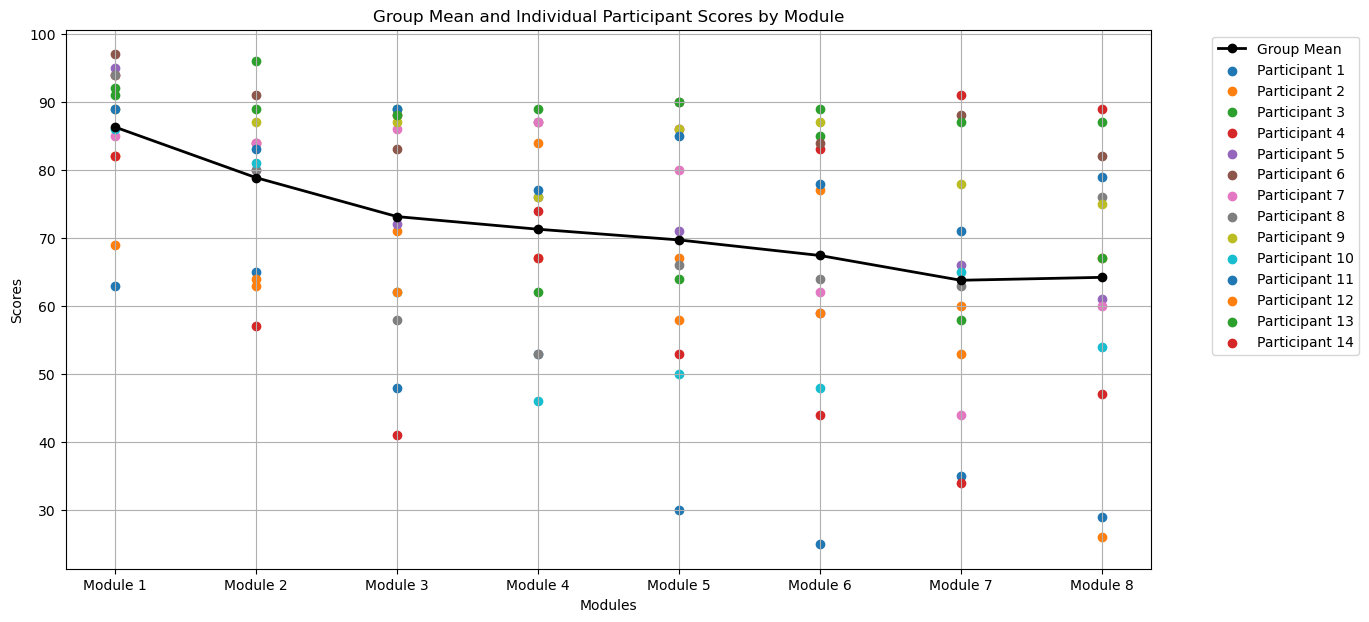

In [289]:
import matplotlib.pyplot as plt
import numpy as np

# Data provided
data = [
    ([63, 65, 48, 53, 30, 25, 35, 29], 70),
    ([69, 64, 71, 84, 67, 77, 60, 67], 1),
    ([92, 96, 89, 62, 64, 85, 58, 67], 40),
    ([94, 84, 88, 74, 86, 83, 91, 89], 10),
    ([95, 80, 72, 76, 71, 59, 66, 61], 10),
    ([97, 91, 83, 87, 90, 84, 88, 82], 60),
    ([85, 84, 86, 87, 80, 62, 44, 60], 50),
    ([94, 80, 58, 53, 66, 64, 63, 76], 10),
    ([89, 87, 87, 76, 86, 87, 78, 75], 20),
    ([86, 81, 62, 46, 50, 48, 65, 54], 55),
    ([89, 83, 89, 77, 85, 78, 71, 79], 1),
    ([82, 63, 62, 67, 58, 59, 53, 26], 10),
    ([91, 89, 88, 89, 90, 89, 87, 87], 80),
    ([82, 57, 41, 67, 53, 44, 34, 47], 50)
]

# Separate the feature data (X) and target values (y)
X = np.array([x for x, _ in data])
y = np.array([y for _, y in data])

# Calculate the mean of each feature across all participants
mean_values = np.mean(X, axis=0)

# Number of modules (features)
modules = ['Module ' + str(i+1) for i in range(X.shape[1])]

# Plotting
plt.figure(figsize=(14, 7))

# Plot the mean value as a line chart for comparison
plt.plot(modules, mean_values, 'k-o', linewidth=2, label='Group Mean')

# Plot each participant's data points
for idx, participant in enumerate(X):
    plt.scatter(modules, participant, label=f'Participant {idx+1}')

plt.title('Group Mean and Individual Participant Scores by Module')
plt.xlabel('Modules')
plt.ylabel('Scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
